In [32]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.feature_selection import r_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools
import statsmodels.api as sm


In [2]:
data = pd.read_csv('Full_Descriptors.csv')
data = data.dropna()
features = data.loc[:, ['Molecular Weight', 'Heavy Atom Molecular Weight', 'Max Absolute Partial Charge', 'Max Partial Charge', 
         'Min Abs Partial Charge', 'Min Partial Charge', 'Radical Electrons', 'Valence Electrons', 'NHOH Count', 'NO Count',
         'H Acceptors', 'H Donors', 'Ring Count', 'Aliphatic Rings', 'Aromatic Rings', 'Saturated Rings', 'Aromatic Carbocycles',
         'Aromatic Heterocycles', 'Heteroatoms', 'Rotatable Bonds', 'Saturated Carbocycles', 'Saturated Heterocycles', 'H Count',
         'C Count', 'N Count', 'F Count', 'Halogen Count', 'Double Bonds', 'Triple Bonds']]
feature_list = features.columns

In [60]:
pearsoncorr = features.corr(method='pearson')
pearsoncorr

,Molecular Weight,Heavy Atom Molecular Weight,Max Absolute Partial Charge,Max Partial Charge,Min Abs Partial Charge,Min Partial Charge,Radical Electrons,Valence Electrons,NHOH Count,NO Count,...,Rotatable Bonds,Saturated Carbocycles,Saturated Heterocycles,H Count,C Count,N Count,F Count,Halogen Count,Double Bonds,Triple Bonds
Molecular Weight,1.000000,0.999622,0.052331,0.100084,0.091867,-0.044519,NaN,0.978527,0.037849,0.238435,...,0.732825,NaN,0.217489,0.834730,0.909868,0.146688,0.010727,0.010727,0.270108,0.072322
Heavy Atom Molecular Weight,0.999622,1.000000,0.047686,0.098367,0.089144,-0.039193,NaN,0.973436,0.025945,0.237239,...,0.727006,NaN,0.220079,0.819274,0.899747,0.146499,0.018423,0.018423,0.268606,0.068707
Max Absolute Partial Charge,0.052331,0.047686,1.000000,0.588037,0.603423,-0.989018,NaN,0.130341,0.431633,0.571382,...,0.390706,NaN,0.032198,0.136311,0.082411,-0.038521,0.061636,0.061636,0.239315,0.179779
Max Partial Charge,0.100084,0.098367,0.588037,1.000000,0.982259,-0.551719,NaN,0.158592,0.624042,0.497536,...,0.299805,NaN,0.101459,0.117176,0.092011,-0.042792,0.227675,0.227675,0.490032,0.257734
Min Abs Partial Charge,0.091867,0.089144,0.603423,0.982259,1.000000,-0.594586,NaN,0.153803,0.647853,0.518076,...,0.298315,NaN,0.087359,0.130520,0.101595,-0.041793,0.083803,0.083803,0.496741,0.275832
Min Partial Charge,-0.044519,-0.039193,-0.989018,-0.551719,-0.594586,1.000000,NaN,-0.123180,-0.434771,-0.572134,...,-0.379913,NaN,-0.019364,-0.143500,-0.087977,0.036105,0.053979,0.053979,-0.234138,-0.187548
Radical Electrons,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Valence Electrons,0.978527,0.973436,0.130341,0.158592,0.153803,-0.123180,NaN,1.000000,0.152620,0.314534,...,0.774648,NaN,0.188529,0.911347,0.965445,0.190504,-0.000928,-0.000928,0.299223,0.135961
NHOH Count,0.037849,0.025945,0.431633,0.624042,0.647853,-0.434771,NaN,0.152620,1.000000,0.378895,...,0.366902,NaN,0.019464,0.269697,0.212263,0.163101,-0.078988,-0.078988,0.200897,0.358335
NO Count,0.238435,0.237239,0.571382,0.497536,0.518076,-0.572134,NaN,0.314534,0.378895,1.000000,...,0.461960,NaN,0.138015,0.221165,0.222457,0.538805,-0.108986,-0.108986,0.455858,0.351268


<AxesSubplot:>

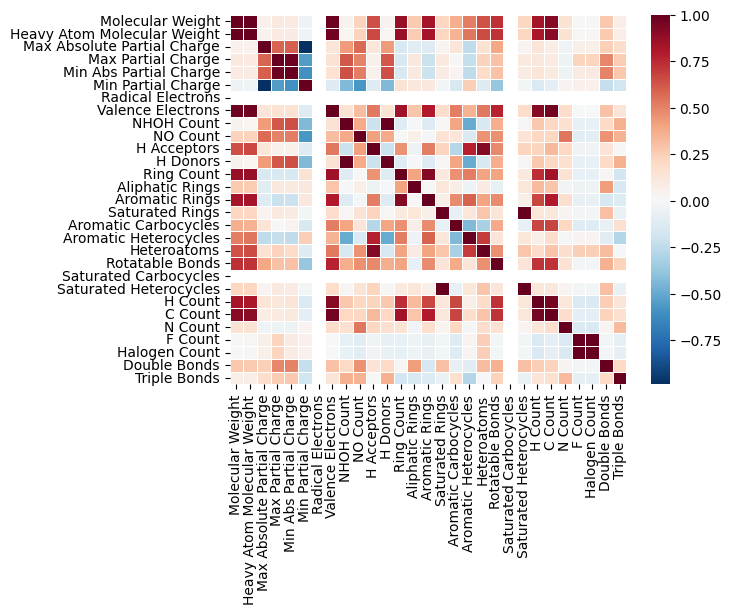

In [63]:
import seaborn as sb
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=False,
            linewidth=0.5)

In [64]:
y = data['LUMO']
X = data.loc[:, ['Molecular Weight', 'Heavy Atom Molecular Weight', 'Max Absolute Partial Charge', 'Max Partial Charge', 
         'Min Abs Partial Charge', 'Min Partial Charge', 'Radical Electrons', 'Valence Electrons', 'NHOH Count', 'NO Count',
         'H Acceptors', 'H Donors', 'Ring Count', 'Aliphatic Rings', 'Aromatic Rings', 'Saturated Rings', 'Aromatic Carbocycles',
         'Aromatic Heterocycles', 'Heteroatoms', 'Rotatable Bonds', 'Saturated Carbocycles', 'Saturated Heterocycles', 'H Count',
         'C Count', 'N Count', 'F Count', 'Halogen Count', 'Double Bonds', 'Triple Bonds']]
list_numerical = X.columns


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [67]:

regressor_OLS = sm.OLS(endog = y_train, exog = X_train).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   LUMO   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              543.6
Date:                Tue, 27 Jun 2023   Prob (F-statistic):                   1.01e-198
Time:                        11:08:33   Log-Likelihood:                          717.75
No. Observations:                 279   AIC:                                     -1396.
Df Residuals:                     259   BIC:                                     -1323.
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Molecular Weight               -0.0021      0.001     -1.796      0.074      -0.004       0.000
Heavy Atom Molecular Weight     0.0013      0.001      1.524      0.129      -0.000       0.003
Max Absolute Partial Charge    -1.4565      1.512     -0.963      0.336      -4.434       1.521
Max Partial Charge              1.2466      1.509      0.826      0.409      -1.724       4.217
Min Abs Partial Charge         -1.3661      1.511     -0.904      0.367      -4.341       1.609
Min Partial Charge             -1.3405      1.513     -0.886      0.377      -4.320       1.639
Radical Electrons            1.111e-13   1.24e-13      0.895      0.372   -1.33e-13    3.56e-13
Valence Electrons               0.0056      0.003      1.634      0.103      -0.001       0.012
NHOH Count                      0.0083      0.003      2.657      0.008       0.002       0.014
NO Count                       -0.0064      0.006     -1.011      0.313      -0.019       0.006
H Acceptors                    -0.0023      0.003     -0.717      0.474      -0.009       0.004
H Donors                        0.0083      0.003      2.657      0.008       0.002       0.014
Ring Count                     -0.0005      0.002     -0.252      0.801      -0.005       0.004
Aliphatic Rings                 0.0002      0.001      0.161      0.873      -0.002       0.003
Aromatic Rings                 -0.0007      0.001     -0.530      0.597      -0.004       0.002
Saturated Rings                 0.0048      0.004      1.294      0.197      -0.002       0.012
Aromatic Carbocycles           -0.0010      0.001     -0.799      0.425      -0.004       0.001
Aromatic Heterocycles           0.0003      0.001      0.242      0.809      -0.002       0.002
Heteroatoms                    -0.0087      0.007     -1.206      0.229      -0.023       0.006
Rotatable Bonds                 0.0038      0.001      2.718      0.007       0.001       0.007
Saturated Carbocycles                0          0        nan        nan           0           0
Saturated Heterocycles          0.0048      0.004      1.294      0.197      -0.002       0.012
H Count                        -0.0033      0.002     -1.687      0.093      -0.007       0.001
C Count                        -0.0134      0.010     -1.351      0.178      -0.033       0.006
N Count                        -0.0088      0.003     -2.744      0.006      -0.015      -0.002
F Count                        -0.0073      0.005     -1.426      0.155      -0.017       0.003
Halogen Count                  -0.0073      0.005     -1.426      0.155      -0.017       0.003
Double Bonds                   -0.0023      0.001     -1.618      0.107      -0.005       0.001
Triple B

In [68]:
y = data['LUMO']
X = data.loc[:, ['Molecular Weight', 'Heavy Atom Molecular Weight', 'Max Absolute Partial Charge', 'Max Partial Charge', 
         'Min Abs Partial Charge', 'Min Partial Charge', 'Radical Electrons', 'Valence Electrons', 'NHOH Count', 'NO Count',
         'H Acceptors', 'H Donors', 'Ring Count', 'Aromatic Rings', 'Saturated Rings', 'Aromatic Carbocycles',
         'Aromatic Heterocycles', 'Heteroatoms', 'Rotatable Bonds', 'Saturated Carbocycles', 'Saturated Heterocycles', 'H Count',
         'C Count', 'N Count', 'F Count', 'Halogen Count', 'Double Bonds', 'Triple Bonds']]
list_numerical = X.columns


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [69]:
regressor_OLS = sm.OLS(endog = y_train, exog = X_train).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   LUMO   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              543.6
Date:                Tue, 27 Jun 2023   Prob (F-statistic):                   1.01e-198
Time:                        11:13:05   Log-Likelihood:                          717.75
No. Observations:                 279   AIC:                                     -1396.
Df Residuals:                     259   BIC:                                     -1323.
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Molecular Weight               -0.0021      0.001     -1.796      0.074      -0.004       0.000
Heavy Atom Molecular Weight     0.0013      0.001      1.524      0.129      -0.000       0.003
Max Absolute Partial Charge    -1.4565      1.512     -0.963      0.336      -4.434       1.521
Max Partial Charge              1.2466      1.509      0.826      0.409      -1.724       4.217
Min Abs Partial Charge         -1.3661      1.511     -0.904      0.367      -4.341       1.609
Min Partial Charge             -1.3405      1.513     -0.886      0.377      -4.320       1.639
Radical Electrons           -5.701e-13   6.36e-13     -0.896      0.371   -1.82e-12    6.83e-13
Valence Electrons               0.0056      0.003      1.634      0.103      -0.001       0.012
NHOH Count                      0.0083      0.003      2.657      0.008       0.002       0.014
NO Count                       -0.0064      0.006     -1.011      0.313      -0.019       0.006
H Acceptors                    -0.0023      0.003     -0.717      0.474      -0.009       0.004
H Donors                        0.0083      0.003      2.657      0.008       0.002       0.014
Ring Count                     -0.0003      0.003     -0.095      0.925      -0.007       0.006
Aromatic Rings                 -0.0009      0.002     -0.566      0.572      -0.004       0.002
Saturated Rings                 0.0048      0.004      1.294      0.197      -0.002       0.012
Aromatic Carbocycles           -0.0011      0.001     -0.810      0.419      -0.004       0.002
Aromatic Heterocycles           0.0002      0.001      0.172      0.863      -0.002       0.002
Heteroatoms                    -0.0087      0.007     -1.206      0.229      -0.023       0.006
Rotatable Bonds                 0.0038      0.001      2.718      0.007       0.001       0.007
Saturated Carbocycles       -3.359e-17   5.03e-17     -0.668      0.504   -1.33e-16    6.54e-17
Saturated Heterocycles          0.0048      0.004      1.294      0.197      -0.002       0.012
H Count                        -0.0033      0.002     -1.687      0.093      -0.007       0.001
C Count                        -0.0134      0.010     -1.351      0.178      -0.033       0.006
N Count                        -0.0088      0.003     -2.744      0.006      -0.015      -0.002
F Count                        -0.0073      0.005     -1.426      0.155      -0.017       0.003
Halogen Count                  -0.0073      0.005     -1.426      0.155      -0.017       0.003
Double Bonds                   -0.0023      0.001     -1.618      0.107      -0.005       0.001
Triple Bonds                   -0.0036      0.003     -1.090      0.277      -0.010       0.003
========

In [70]:
y = data['LUMO']
X = data.loc[:, ['Molecular Weight', 'Heavy Atom Molecular Weight', 'Max Absolute Partial Charge', 'Max Partial Charge', 
         'Min Abs Partial Charge', 'Min Partial Charge', 'Radical Electrons', 'Valence Electrons', 'NHOH Count', 'NO Count',
         'H Acceptors', 'H Donors', 'Aromatic Rings', 'Saturated Rings', 'Aromatic Carbocycles',
         'Aromatic Heterocycles', 'Heteroatoms', 'Rotatable Bonds', 'Saturated Carbocycles', 'Saturated Heterocycles', 'H Count',
         'C Count', 'N Count', 'F Count', 'Halogen Count', 'Double Bonds', 'Triple Bonds']]
list_numerical = X.columns


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

regressor_OLS = sm.OLS(endog = y_train, exog = X_train).fit()
regressor_OLS.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   LUMO   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              574.4
Date:                Tue, 27 Jun 2023   Prob (F-statistic):                   4.15e-200
Time:                        11:13:41   Log-Likelihood:                          717.75
No. Observations:                 279   AIC:                                     -1397.
Df Residuals:                     260   BIC:                                     -1329.
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Molecular Weight               -0.0021      0.001     -1.797      0.073      -0.004       0.000
Heavy Atom Molecular Weight     0.0013      0.001      1.526      0.128      -0.000       0.003
Max Absolute Partial Charge    -1.4490      1.507     -0.961      0.337      -4.417       1.519
Max Partial Charge              1.2387      1.503      0.824      0.411      -1.722       4.199
Min Abs Partial Charge         -1.3576      1.505     -0.902      0.368      -4.321       1.606
Min Partial Charge             -1.3326      1.508     -0.884      0.378      -4.302       1.637
Radical Electrons            1.883e-13   2.11e-13      0.892      0.373   -2.27e-13    6.04e-13
Valence Electrons               0.0056      0.003      1.645      0.101      -0.001       0.012
NHOH Count                      0.0082      0.003      2.675      0.008       0.002       0.014
NO Count                       -0.0065      0.006     -1.025      0.306      -0.019       0.006
H Acceptors                    -0.0023      0.003     -0.715      0.475      -0.009       0.004
H Donors                        0.0082      0.003      2.675      0.008       0.002       0.014
Aromatic Rings                 -0.0009      0.002     -0.571      0.569      -0.004       0.002
Saturated Rings                 0.0049      0.004      1.397      0.164      -0.002       0.012
Aromatic Carbocycles           -0.0011      0.001     -0.815      0.416      -0.004       0.002
Aromatic Heterocycles           0.0002      0.001      0.171      0.864      -0.002       0.002
Heteroatoms                    -0.0087      0.007     -1.210      0.227      -0.023       0.005
Rotatable Bonds                 0.0040      0.001      4.798      0.000       0.002       0.006
Saturated Carbocycles        1.371e-16   1.65e-16      0.831      0.407   -1.88e-16    4.62e-16
Saturated Heterocycles          0.0049      0.004      1.397      0.164      -0.002       0.012
H Count                        -0.0033      0.002     -1.687      0.093      -0.007       0.001
C Count                        -0.0135      0.010     -1.368      0.172      -0.033       0.006
N Count                        -0.0088      0.003     -2.756      0.006      -0.015      -0.003
F Count                        -0.0073      0.005     -1.426      0.155      -0.017       0.003
Halogen Count                  -0.0073      0.005     -1.426      0.155      -0.017       0.003
Double Bonds                   -0.0023      0.001     -1.625      0.105      -0.005       0.000
Triple Bonds                   -0.0033      0.002     -1.477      0.141      -0.008       0.001
==============================================================================
Omnibus:                 

In [71]:
y = data['LUMO']
X = data.loc[:, ['Molecular Weight', 'Heavy Atom Molecular Weight', 'Max Absolute Partial Charge', 'Max Partial Charge', 
         'Min Abs Partial Charge', 'Min Partial Charge', 'Radical Electrons', 'Valence Electrons', 'NHOH Count', 'NO Count',
         'H Acceptors', 'H Donors', 'Aromatic Rings', 'Saturated Rings', 'Aromatic Carbocycles',
         'Heteroatoms', 'Rotatable Bonds', 'Saturated Carbocycles', 'Saturated Heterocycles', 'H Count',
         'C Count', 'N Count', 'F Count', 'Halogen Count', 'Double Bonds', 'Triple Bonds']]
list_numerical = X.columns


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

regressor_OLS = sm.OLS(endog = y_train, exog = X_train).fit()
regressor_OLS.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   LUMO   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              574.4
Date:                Tue, 27 Jun 2023   Prob (F-statistic):                   4.15e-200
Time:                        11:14:22   Log-Likelihood:                          717.75
No. Observations:                 279   AIC:                                     -1397.
Df Residuals:                     260   BIC:                                     -1329.
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Molecular Weight               -0.0021      0.001     -1.797      0.073      -0.004       0.000
Heavy Atom Molecular Weight     0.0013      0.001      1.526      0.128      -0.000       0.003
Max Absolute Partial Charge    -1.4490      1.507     -0.961      0.337      -4.417       1.519
Max Partial Charge              1.2387      1.503      0.824      0.411      -1.722       4.199
Min Abs Partial Charge         -1.3576      1.505     -0.902      0.368      -4.321       1.606
Min Partial Charge             -1.3326      1.508     -0.884      0.378      -4.302       1.637
Radical Electrons           -1.306e-13   1.46e-13     -0.895      0.372   -4.18e-13    1.57e-13
Valence Electrons               0.0056      0.003      1.645      0.101      -0.001       0.012
NHOH Count                      0.0082      0.003      2.675      0.008       0.002       0.014
NO Count                       -0.0065      0.006     -1.025      0.306      -0.019       0.006
H Acceptors                    -0.0023      0.003     -0.715      0.475      -0.009       0.004
H Donors                        0.0082      0.003      2.675      0.008       0.002       0.014
Aromatic Rings                 -0.0007      0.002     -0.292      0.771      -0.005       0.004
Saturated Rings                 0.0049      0.004      1.397      0.164      -0.002       0.012
Aromatic Carbocycles           -0.0013      0.002     -0.665      0.507      -0.005       0.003
Heteroatoms                    -0.0087      0.007     -1.210      0.227      -0.023       0.005
Rotatable Bonds                 0.0040      0.001      4.798      0.000       0.002       0.006
Saturated Carbocycles       -8.591e-16   9.51e-16     -0.903      0.367   -2.73e-15    1.01e-15
Saturated Heterocycles          0.0049      0.004      1.397      0.164      -0.002       0.012
H Count                        -0.0033      0.002     -1.687      0.093      -0.007       0.001
C Count                        -0.0135      0.010     -1.368      0.172      -0.033       0.006
N Count                        -0.0088      0.003     -2.756      0.006      -0.015      -0.003
F Count                        -0.0073      0.005     -1.426      0.155      -0.017       0.003
Halogen Count                  -0.0073      0.005     -1.426      0.155      -0.017       0.003
Double Bonds                   -0.0023      0.001     -1.625      0.105      -0.005       0.000
Triple Bonds                   -0.0033      0.002     -1.477      0.141      -0.008       0.001
==============================================================================
Omnibus:                        3.962   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.138   Ja

In [72]:
y = data['LUMO']
X = data.loc[:, ['Molecular Weight', 'Heavy Atom Molecular Weight', 'Max Absolute Partial Charge', 'Max Partial Charge', 
         'Min Abs Partial Charge', 'Min Partial Charge', 'Radical Electrons', 'Valence Electrons', 'NHOH Count', 'NO Count',
         'H Acceptors', 'H Donors','Saturated Rings', 'Aromatic Carbocycles',
         'Heteroatoms', 'Rotatable Bonds', 'Saturated Carbocycles', 'Saturated Heterocycles', 'H Count',
         'C Count', 'N Count', 'F Count', 'Halogen Count', 'Double Bonds', 'Triple Bonds']]
list_numerical = X.columns


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

regressor_OLS = sm.OLS(endog = y_train, exog = X_train).fit()
regressor_OLS.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   LUMO   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              608.4
Date:                Tue, 27 Jun 2023   Prob (F-statistic):                   1.73e-201
Time:                        11:15:31   Log-Likelihood:                          717.70
No. Observations:                 279   AIC:                                     -1399.
Df Residuals:                     261   BIC:                                     -1334.
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Molecular Weight               -0.0021      0.001     -1.786      0.075      -0.004       0.000
Heavy Atom Molecular Weight     0.0012      0.001      1.504      0.134      -0.000       0.003
Max Absolute Partial Charge    -1.4539      1.505     -0.966      0.335      -4.416       1.509
Max Partial Charge              1.2454      1.501      0.830      0.407      -1.709       4.200
Min Abs Partial Charge         -1.3644      1.502     -0.908      0.365      -4.323       1.594
Min Partial Charge             -1.3367      1.505     -0.888      0.375      -4.301       1.627
Radical Electrons            7.678e-14   8.53e-14      0.900      0.369   -9.12e-14    2.45e-13
Valence Electrons               0.0056      0.003      1.660      0.098      -0.001       0.012
NHOH Count                      0.0083      0.003      2.719      0.007       0.002       0.014
NO Count                       -0.0065      0.006     -1.023      0.307      -0.019       0.006
H Acceptors                    -0.0025      0.003     -0.793      0.429      -0.009       0.004
H Donors                        0.0083      0.003      2.719      0.007       0.002       0.014
Saturated Rings                 0.0049      0.003      1.416      0.158      -0.002       0.012
Aromatic Carbocycles           -0.0014      0.002     -0.762      0.447      -0.005       0.002
Heteroatoms                    -0.0087      0.007     -1.206      0.229      -0.023       0.005
Rotatable Bonds                 0.0040      0.001      5.025      0.000       0.002       0.006
Saturated Carbocycles         3.44e-16   3.82e-16      0.901      0.369   -4.08e-16     1.1e-15
Saturated Heterocycles          0.0049      0.003      1.416      0.158      -0.002       0.012
H Count                        -0.0033      0.002     -1.671      0.096      -0.007       0.001
C Count                        -0.0137      0.010     -1.395      0.164      -0.033       0.006
N Count                        -0.0089      0.003     -2.801      0.005      -0.015      -0.003
F Count                        -0.0073      0.005     -1.432      0.153      -0.017       0.003
Halogen Count                  -0.0073      0.005     -1.432      0.153      -0.017       0.003
Double Bonds                   -0.0021      0.001     -1.656      0.099      -0.005       0.000
Triple Bonds                   -0.0030      0.002     -1.613      0.108      -0.007       0.001
==============================================================================
Omnibus:                        4.040   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.133   Jarque-Bera (JB):                4.499
Skew:                          -0.127   Prob(JB):          

In [73]:
y = data['LUMO']
X = data.loc[:, ['Molecular Weight', 'Heavy Atom Molecular Weight', 'Max Absolute Partial Charge', 'Max Partial Charge', 
         'Min Abs Partial Charge', 'Min Partial Charge', 'Radical Electrons', 'Valence Electrons', 'NHOH Count', 'NO Count',
         'H Donors','Saturated Rings', 'Aromatic Carbocycles',
         'Heteroatoms', 'Rotatable Bonds', 'Saturated Carbocycles', 'Saturated Heterocycles', 'H Count',
         'C Count', 'N Count', 'F Count', 'Halogen Count', 'Double Bonds', 'Triple Bonds']]
list_numerical = X.columns


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

regressor_OLS = sm.OLS(endog = y_train, exog = X_train).fit()
regressor_OLS.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   LUMO   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              645.1
Date:                Tue, 27 Jun 2023   Prob (F-statistic):                   9.18e-203
Time:                        11:16:11   Log-Likelihood:                          717.37
No. Observations:                 279   AIC:                                     -1401.
Df Residuals:                     262   BIC:                                     -1339.
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Molecular Weight               -0.0016      0.001     -1.618      0.107      -0.003       0.000
Heavy Atom Molecular Weight     0.0008      0.001      1.289      0.199      -0.000       0.002
Max Absolute Partial Charge    -1.4240      1.503     -0.947      0.344      -4.383       1.535
Max Partial Charge              1.2269      1.499      0.818      0.414      -1.725       4.179
Min Abs Partial Charge         -1.3458      1.501     -0.897      0.371      -4.302       1.610
Min Partial Charge             -1.3053      1.504     -0.868      0.386      -4.266       1.656
Radical Electrons            6.792e-14   7.68e-14      0.884      0.378   -8.34e-14    2.19e-13
Valence Electrons               0.0041      0.003      1.467      0.144      -0.001       0.010
NHOH Count                      0.0092      0.003      3.238      0.001       0.004       0.015
NO Count                       -0.0044      0.006     -0.762      0.447      -0.016       0.007
H Donors                        0.0092      0.003      3.238      0.001       0.004       0.015
Saturated Rings                 0.0052      0.003      1.510      0.132      -0.002       0.012
Aromatic Carbocycles           -0.0015      0.002     -0.790      0.430      -0.005       0.002
Heteroatoms                    -0.0058      0.006     -0.932      0.352      -0.018       0.006
Rotatable Bonds                 0.0037      0.001      5.243      0.000       0.002       0.005
Saturated Carbocycles        1.946e-15   2.21e-15      0.882      0.379    -2.4e-15    6.29e-15
Saturated Heterocycles          0.0052      0.003      1.510      0.132      -0.002       0.012
H Count                        -0.0024      0.002     -1.487      0.138      -0.006       0.001
C Count                        -0.0090      0.008     -1.150      0.251      -0.024       0.006
N Count                        -0.0103      0.003     -3.879      0.000      -0.015      -0.005
F Count                        -0.0046      0.004     -1.208      0.228      -0.012       0.003
Halogen Count                  -0.0046      0.004     -1.208      0.228      -0.012       0.003
Double Bonds                   -0.0014      0.001     -1.558      0.120      -0.003       0.000
Triple Bonds                   -0.0035      0.002     -2.025      0.044      -0.007   -9.67e-05
==============================================================================
Omnibus:                        4.552   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.103   Jarque-Bera (JB):                4.818
Skew:                          -0.181   Prob(JB):                       0.0899
Kurtosis:                       3.532   Cond. No.                     2.03e+

In [74]:
y = data['LUMO']
X = data.loc[:, ['Molecular Weight', 'Heavy Atom Molecular Weight', 'Max Absolute Partial Charge', 'Max Partial Charge', 
         'Min Abs Partial Charge', 'Min Partial Charge', 'Radical Electrons', 'Valence Electrons', 'NHOH Count',
         'H Donors','Saturated Rings', 'Aromatic Carbocycles',
         'Heteroatoms', 'Rotatable Bonds', 'Saturated Carbocycles', 'Saturated Heterocycles', 'H Count',
         'C Count', 'N Count', 'F Count', 'Halogen Count', 'Double Bonds', 'Triple Bonds']]
list_numerical = X.columns


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

regressor_OLS = sm.OLS(endog = y_train, exog = X_train).fit()
regressor_OLS.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   LUMO   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              645.1
Date:                Tue, 27 Jun 2023   Prob (F-statistic):                   9.18e-203
Time:                        11:16:37   Log-Likelihood:                          717.37
No. Observations:                 279   AIC:                                     -1401.
Df Residuals:                     262   BIC:                                     -1339.
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Molecular Weight               -0.0013      0.001     -2.046      0.042      -0.003   -4.81e-05
Heavy Atom Molecular Weight     0.0008      0.001      1.288      0.199      -0.000       0.002
Max Absolute Partial Charge    -1.4240      1.503     -0.947      0.344      -4.383       1.535
Max Partial Charge              1.2269      1.499      0.818      0.414      -1.725       4.179
Min Abs Partial Charge         -1.3458      1.501     -0.897      0.371      -4.302       1.610
Min Partial Charge             -1.3053      1.504     -0.868      0.386      -4.266       1.656
Radical Electrons           -4.185e-13   4.74e-13     -0.883      0.378   -1.35e-12    5.14e-13
Valence Electrons               0.0036      0.002      1.693      0.092      -0.001       0.008
NHOH Count                      0.0092      0.003      3.238      0.001       0.004       0.015
H Donors                        0.0092      0.003      3.238      0.001       0.004       0.015
Saturated Rings                 0.0052      0.003      1.510      0.132      -0.002       0.012
Aromatic Carbocycles           -0.0015      0.002     -0.790      0.430      -0.005       0.002
Heteroatoms                    -0.0112      0.013     -0.843      0.400      -0.037       0.015
Rotatable Bonds                 0.0037      0.001      5.243      0.000       0.002       0.005
Saturated Carbocycles        2.575e-15   2.91e-15      0.886      0.376   -3.15e-15     8.3e-15
Saturated Heterocycles          0.0052      0.003      1.510      0.132      -0.002       0.012
H Count                        -0.0021      0.001     -1.665      0.097      -0.005       0.000
C Count                        -0.0101      0.009     -1.092      0.276      -0.028       0.008
N Count                        -0.0103      0.003     -3.878      0.000      -0.016      -0.005
F Count                        -0.0026      0.002     -1.576      0.116      -0.006       0.001
Halogen Count                  -0.0026      0.002     -1.576      0.116      -0.006       0.001
Double Bonds                   -0.0014      0.001     -1.558      0.120      -0.003       0.000
Triple Bonds                   -0.0035      0.002     -2.025      0.044      -0.007   -9.67e-05
==============================================================================
Omnibus:                        4.552   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.103   Jarque-Bera (JB):                4.818
Skew:                          -0.181   Prob(JB):                       0.0899
Kurtosis:                       3.532   Cond. No.                     6.32e+20
==============================================================================

Notes:
[1] R²

In [75]:
y = data['LUMO']
X = data.loc[:, ['Molecular Weight', 'Heavy Atom Molecular Weight', 'Max Absolute Partial Charge', 'Max Partial Charge', 
         'Min Abs Partial Charge', 'Min Partial Charge', 'Radical Electrons', 'Valence Electrons', 'NHOH Count',
         'H Donors','Saturated Rings', 'Aromatic Carbocycles',
         'Heteroatoms', 'Rotatable Bonds', 'Saturated Carbocycles', 'Saturated Heterocycles', 'H Count',
         'C Count', 'N Count', 'F Count', 'Halogen Count', 'Double Bonds', 'Triple Bonds']]
list_numerical = X.columns


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

regressor_OLS = sm.OLS(endog = y_train, exog = X_train).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   LUMO   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              645.1
Date:                Tue, 27 Jun 2023   Prob (F-statistic):                   9.18e-203
Time:                        11:17:19   Log-Likelihood:                          717.37
No. Observations:                 279   AIC:                                     -1401.
Df Residuals:                     262   BIC:                                     -1339.
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Molecular Weight               -0.0013      0.001     -2.046      0.042      -0.003   -4.81e-05
Heavy Atom Molecular Weight     0.0008      0.001      1.288      0.199      -0.000       0.002
Max Absolute Partial Charge    -1.4240      1.503     -0.947      0.344      -4.383       1.535
Max Partial Charge              1.2269      1.499      0.818      0.414      -1.725       4.179
Min Abs Partial Charge         -1.3458      1.501     -0.897      0.371      -4.302       1.610
Min Partial Charge             -1.3053      1.504     -0.868      0.386      -4.266       1.656
Radical Electrons           -4.185e-13   4.74e-13     -0.883      0.378   -1.35e-12    5.14e-13
Valence Electrons               0.0036      0.002      1.693      0.092      -0.001       0.008
NHOH Count                      0.0092      0.003      3.238      0.001       0.004       0.015
H Donors                        0.0092      0.003      3.238      0.001       0.004       0.015
Saturated Rings                 0.0052      0.003      1.510      0.132      -0.002       0.012
Aromatic Carbocycles           -0.0015      0.002     -0.790      0.430      -0.005       0.002
Heteroatoms                    -0.0112      0.013     -0.843      0.400      -0.037       0.015
Rotatable Bonds                 0.0037      0.001      5.243      0.000       0.002       0.005
Saturated Carbocycles        2.575e-15   2.91e-15      0.886      0.376   -3.15e-15     8.3e-15
Saturated Heterocycles          0.0052      0.003      1.510      0.132      -0.002       0.012
H Count                        -0.0021      0.001     -1.665      0.097      -0.005       0.000
C Count                        -0.0101      0.009     -1.092      0.276      -0.028       0.008
N Count                        -0.0103      0.003     -3.878      0.000      -0.016      -0.005
F Count                        -0.0026      0.002     -1.576      0.116      -0.006       0.001
Halogen Count                  -0.0026      0.002     -1.576      0.116      -0.006       0.001
Double Bonds                   -0.0014      0.001     -1.558      0.120      -0.003       0.000
Triple Bonds                   -0.0035      0.002     -2.025      0.044      -0.007   -9.67e-05
==============================================================================
Omnibus:                        4.552   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.103   Jarque-Bera (JB):                4.818
Skew:                          -0.181   Prob(JB):                       0.0899
Kurtosis:                       3.532   Cond. No.                     6.32e+20
==============================================================================

Notes:
[1] R²

In [76]:
y = data['LUMO']
X = data.loc[:, ['Molecular Weight', 'Heavy Atom Molecular Weight', 'Max Absolute Partial Charge', 'Max Partial Charge', 
         'Min Abs Partial Charge', 'Min Partial Charge', 'Radical Electrons', 'Valence Electrons', 'NHOH Count',
         'H Donors','Saturated Rings', 'Aromatic Carbocycles',
         'Rotatable Bonds', 'Saturated Carbocycles', 'Saturated Heterocycles', 'H Count',
         'C Count', 'N Count', 'F Count', 'Halogen Count', 'Double Bonds', 'Triple Bonds']]
list_numerical = X.columns


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

regressor_OLS = sm.OLS(endog = y_train, exog = X_train).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   LUMO   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              686.1
Date:                Tue, 27 Jun 2023   Prob (F-statistic):                   4.91e-204
Time:                        11:17:45   Log-Likelihood:                          716.99
No. Observations:                 279   AIC:                                     -1402.
Df Residuals:                     263   BIC:                                     -1344.
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Molecular Weight               -0.0008      0.000     -3.206      0.002      -0.001      -0.000
Heavy Atom Molecular Weight     0.0003      0.000      1.648      0.100   -6.09e-05       0.001
Max Absolute Partial Charge    -1.3834      1.501     -0.921      0.358      -4.340       1.573
Max Partial Charge              1.1815      1.498      0.789      0.431      -1.767       4.130
Min Abs Partial Charge         -1.3022      1.499     -0.869      0.386      -4.254       1.650
Min Partial Charge             -1.2659      1.502     -0.843      0.400      -4.224       1.692
Radical Electrons            2.651e-13    3.1e-13      0.855      0.393   -3.45e-13    8.76e-13
Valence Electrons               0.0018      0.000      4.574      0.000       0.001       0.003
NHOH Count                      0.0093      0.003      3.268      0.001       0.004       0.015
H Donors                        0.0093      0.003      3.268      0.001       0.004       0.015
Saturated Rings                 0.0057      0.003      1.652      0.100      -0.001       0.012
Aromatic Carbocycles           -0.0020      0.002     -1.150      0.251      -0.005       0.001
Rotatable Bonds                 0.0038      0.001      5.455      0.000       0.002       0.005
Saturated Carbocycles        1.337e-14   1.56e-14      0.855      0.393   -1.74e-14    4.42e-14
Saturated Heterocycles          0.0057      0.003      1.652      0.100      -0.001       0.012
H Count                        -0.0011      0.000     -2.559      0.011      -0.002      -0.000
C Count                        -0.0023      0.001     -2.287      0.023      -0.004      -0.000
N Count                        -0.0123      0.001    -10.994      0.000      -0.015      -0.010
F Count                        -0.0018      0.001     -1.339      0.182      -0.004       0.001
Halogen Count                  -0.0018      0.001     -1.339      0.182      -0.004       0.001
Double Bonds                   -0.0015      0.001     -1.669      0.096      -0.003       0.000
Triple Bonds                   -0.0039      0.002     -2.401      0.017      -0.007      -0.001
==============================================================================
Omnibus:                        4.149   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.126   Jarque-Bera (JB):                4.597
Skew:                          -0.136   Prob(JB):                        0.100
Kurtosis:                       3.567   Cond. No.                     5.49e+20
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Sta

In [77]:
y = data['LUMO']
X = data.loc[:, ['Molecular Weight', 'Heavy Atom Molecular Weight', 'Max Absolute Partial Charge',
         'Min Abs Partial Charge', 'Min Partial Charge', 'Radical Electrons', 'Valence Electrons', 'NHOH Count',
         'H Donors','Saturated Rings', 'Aromatic Carbocycles',
         'Rotatable Bonds', 'Saturated Carbocycles', 'Saturated Heterocycles', 'H Count',
         'C Count', 'N Count', 'F Count', 'Halogen Count', 'Double Bonds', 'Triple Bonds']]
list_numerical = X.columns


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

regressor_OLS = sm.OLS(endog = y_train, exog = X_train).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   LUMO   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              732.9
Date:                Tue, 27 Jun 2023   Prob (F-statistic):                   2.43e-205
Time:                        11:18:53   Log-Likelihood:                          716.66
No. Observations:                 279   AIC:                                     -1403.
Df Residuals:                     264   BIC:                                     -1349.
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Molecular Weight               -0.0008      0.000     -3.243      0.001      -0.001      -0.000
Heavy Atom Molecular Weight     0.0003      0.000      1.687      0.093   -5.35e-05       0.001
Max Absolute Partial Charge    -0.2024      0.114     -1.777      0.077      -0.427       0.022
Min Abs Partial Charge         -0.1195      0.025     -4.876      0.000      -0.168      -0.071
Min Partial Charge             -0.0842      0.112     -0.751      0.454      -0.305       0.137
Radical Electrons            -2.35e-15   1.79e-15     -1.310      0.191   -5.88e-15    1.18e-15
Valence Electrons               0.0018      0.000      4.589      0.000       0.001       0.003
NHOH Count                      0.0092      0.003      3.241      0.001       0.004       0.015
H Donors                        0.0092      0.003      3.241      0.001       0.004       0.015
Saturated Rings                 0.0057      0.003      1.658      0.098      -0.001       0.012
Aromatic Carbocycles           -0.0020      0.002     -1.144      0.254      -0.005       0.001
Rotatable Bonds                 0.0039      0.001      5.511      0.000       0.002       0.005
Saturated Carbocycles        1.489e-17   2.81e-17      0.530      0.596   -4.04e-17    7.02e-17
Saturated Heterocycles          0.0057      0.003      1.658      0.098      -0.001       0.012
H Count                        -0.0011      0.000     -2.598      0.010      -0.002      -0.000
C Count                        -0.0023      0.001     -2.279      0.023      -0.004      -0.000
N Count                        -0.0123      0.001    -10.996      0.000      -0.015      -0.010
F Count                        -0.0018      0.001     -1.354      0.177      -0.004       0.001
Halogen Count                  -0.0018      0.001     -1.354      0.177      -0.004       0.001
Double Bonds                   -0.0015      0.001     -1.689      0.092      -0.003       0.000
Triple Bonds                   -0.0039      0.002     -2.420      0.016      -0.007      -0.001
==============================================================================
Omnibus:                        3.927   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.140   Jarque-Bera (JB):                4.295
Skew:                          -0.130   Prob(JB):                        0.117
Kurtosis:                       3.550   Cond. No.                     7.15e+20
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The sma

In [78]:
y = data['LUMO']
X = data.loc[:, ['Molecular Weight', 'Heavy Atom Molecular Weight', 'Max Absolute Partial Charge',
         'Min Abs Partial Charge', 'Min Partial Charge', 'Radical Electrons', 'Valence Electrons', 'NHOH Count',
         'H Donors','Saturated Rings', 'Aromatic Carbocycles',
         'Rotatable Bonds', 'Saturated Heterocycles', 'H Count',
         'C Count', 'N Count', 'F Count', 'Halogen Count', 'Double Bonds', 'Triple Bonds']]
list_numerical = X.columns


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

regressor_OLS = sm.OLS(endog = y_train, exog = X_train).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   LUMO   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              732.9
Date:                Tue, 27 Jun 2023   Prob (F-statistic):                   2.43e-205
Time:                        11:19:24   Log-Likelihood:                          716.66
No. Observations:                 279   AIC:                                     -1403.
Df Residuals:                     264   BIC:                                     -1349.
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Molecular Weight               -0.0008      0.000     -3.243      0.001      -0.001      -0.000
Heavy Atom Molecular Weight     0.0003      0.000      1.687      0.093   -5.35e-05       0.001
Max Absolute Partial Charge    -0.2024      0.114     -1.777      0.077      -0.427       0.022
Min Abs Partial Charge         -0.1195      0.025     -4.876      0.000      -0.168      -0.071
Min Partial Charge             -0.0842      0.112     -0.751      0.454      -0.305       0.137
Radical Electrons            3.788e-17   9.86e-17      0.384      0.701   -1.56e-16    2.32e-16
Valence Electrons               0.0018      0.000      4.589      0.000       0.001       0.003
NHOH Count                      0.0092      0.003      3.241      0.001       0.004       0.015
H Donors                        0.0092      0.003      3.241      0.001       0.004       0.015
Saturated Rings                 0.0057      0.003      1.658      0.098      -0.001       0.012
Aromatic Carbocycles           -0.0020      0.002     -1.144      0.254      -0.005       0.001
Rotatable Bonds                 0.0039      0.001      5.511      0.000       0.002       0.005
Saturated Heterocycles          0.0057      0.003      1.658      0.098      -0.001       0.012
H Count                        -0.0011      0.000     -2.598      0.010      -0.002      -0.000
C Count                        -0.0023      0.001     -2.279      0.023      -0.004      -0.000
N Count                        -0.0123      0.001    -10.996      0.000      -0.015      -0.010
F Count                        -0.0018      0.001     -1.354      0.177      -0.004       0.001
Halogen Count                  -0.0018      0.001     -1.354      0.177      -0.004       0.001
Double Bonds                   -0.0015      0.001     -1.689      0.092      -0.003       0.000
Triple Bonds                   -0.0039      0.002     -2.420      0.016      -0.007      -0.001
==============================================================================
Omnibus:                        3.927   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.140   Jarque-Bera (JB):                4.295
Skew:                          -0.130   Prob(JB):                        0.117
Kurtosis:                       3.550   Cond. No.                     2.24e+20
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 4.85e-33. This might indicate that there are
strong multicollinearity proble

In [79]:
y = data['LUMO']
X = data.loc[:, ['Molecular Weight', 'Heavy Atom Molecular Weight', 'Max Absolute Partial Charge',
         'Min Abs Partial Charge', 'Radical Electrons', 'Valence Electrons', 'NHOH Count',
         'H Donors','Saturated Rings', 'Aromatic Carbocycles',
         'Rotatable Bonds', 'Saturated Heterocycles', 'H Count',
         'C Count', 'N Count', 'F Count', 'Halogen Count', 'Double Bonds', 'Triple Bonds']]
list_numerical = X.columns


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

regressor_OLS = sm.OLS(endog = y_train, exog = X_train).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   LUMO   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              786.5
Date:                Tue, 27 Jun 2023   Prob (F-statistic):                   1.13e-206
Time:                        11:20:01   Log-Likelihood:                          716.36
No. Observations:                 279   AIC:                                     -1405.
Df Residuals:                     265   BIC:                                     -1354.
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Molecular Weight               -0.0008      0.000     -3.330      0.001      -0.001      -0.000
Heavy Atom Molecular Weight     0.0003      0.000      1.797      0.073   -3.22e-05       0.001
Max Absolute Partial Charge    -0.1174      0.012     -9.647      0.000      -0.141      -0.093
Min Abs Partial Charge         -0.1189      0.024     -4.856      0.000      -0.167      -0.071
Radical Electrons           -1.003e-16    2.8e-17     -3.583      0.000   -1.55e-16   -4.52e-17
Valence Electrons               0.0018      0.000      4.590      0.000       0.001       0.003
NHOH Count                      0.0091      0.003      3.227      0.001       0.004       0.015
H Donors                        0.0091      0.003      3.227      0.001       0.004       0.015
Saturated Rings                 0.0053      0.003      1.561      0.120      -0.001       0.012
Aromatic Carbocycles           -0.0019      0.002     -1.077      0.282      -0.005       0.002
Rotatable Bonds                 0.0038      0.001      5.489      0.000       0.002       0.005
Saturated Heterocycles          0.0053      0.003      1.561      0.120      -0.001       0.012
H Count                        -0.0012      0.000     -2.697      0.007      -0.002      -0.000
C Count                        -0.0023      0.001     -2.263      0.024      -0.004      -0.000
N Count                        -0.0124      0.001    -11.303      0.000      -0.015      -0.010
F Count                        -0.0023      0.001     -2.043      0.042      -0.005   -8.26e-05
Halogen Count                  -0.0023      0.001     -2.043      0.042      -0.005   -8.26e-05
Double Bonds                   -0.0015      0.001     -1.690      0.092      -0.003       0.000
Triple Bonds                   -0.0039      0.002     -2.394      0.017      -0.007      -0.001
==============================================================================
Omnibus:                        3.611   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.164   Jarque-Bera (JB):                3.998
Skew:                          -0.100   Prob(JB):                        0.135
Kurtosis:                       3.551   Cond. No.                     5.46e+19
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 8.16e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [80]:
y = data['LUMO']
X = data.loc[:, ['Molecular Weight', 'Heavy Atom Molecular Weight', 'Max Absolute Partial Charge',
         'Min Abs Partial Charge', 'Radical Electrons', 'Valence Electrons', 'NHOH Count',
         'H Donors','Saturated Rings',
         'Rotatable Bonds', 'Saturated Heterocycles', 'H Count',
         'C Count', 'N Count', 'F Count', 'Halogen Count', 'Double Bonds', 'Triple Bonds']]
list_numerical = X.columns


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

regressor_OLS = sm.OLS(endog = y_train, exog = X_train).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   LUMO   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              846.4
Date:                Tue, 27 Jun 2023   Prob (F-statistic):                   6.77e-208
Time:                        11:20:30   Log-Likelihood:                          715.75
No. Observations:                 279   AIC:                                     -1406.
Df Residuals:                     266   BIC:                                     -1358.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Molecular Weight               -0.0007      0.000     -3.256      0.001      -0.001      -0.000
Heavy Atom Molecular Weight     0.0002      0.000      1.472      0.142   -8.37e-05       0.001
Max Absolute Partial Charge    -0.1193      0.012     -9.898      0.000      -0.143      -0.096
Min Abs Partial Charge         -0.1141      0.024     -4.738      0.000      -0.161      -0.067
Radical Electrons           -2.426e-17   4.07e-17     -0.596      0.552   -1.04e-16    5.59e-17
Valence Electrons               0.0017      0.000      4.466      0.000       0.001       0.002
NHOH Count                      0.0085      0.003      3.064      0.002       0.003       0.014
H Donors                        0.0085      0.003      3.064      0.002       0.003       0.014
Saturated Rings                 0.0050      0.003      1.489      0.138      -0.002       0.012
Rotatable Bonds                 0.0039      0.001      5.541      0.000       0.002       0.005
Saturated Heterocycles          0.0050      0.003      1.489      0.138      -0.002       0.012
H Count                        -0.0009      0.000     -2.491      0.013      -0.002      -0.000
C Count                        -0.0029      0.001     -3.461      0.001      -0.005      -0.001
N Count                        -0.0124      0.001    -11.255      0.000      -0.015      -0.010
F Count                        -0.0023      0.001     -2.060      0.040      -0.005      -0.000
Halogen Count                  -0.0023      0.001     -2.060      0.040      -0.005      -0.000
Double Bonds                   -0.0012      0.001     -1.398      0.163      -0.003       0.000
Triple Bonds                   -0.0033      0.002     -2.157      0.032      -0.006      -0.000
==============================================================================
Omnibus:                        3.570   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.168   Jarque-Bera (JB):                3.780
Skew:                          -0.125   Prob(JB):                        0.151
Kurtosis:                       3.513   Cond. No.                     5.08e+19
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 9.45e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [81]:
y = data['LUMO']
X = data.loc[:, ['Molecular Weight', 'Heavy Atom Molecular Weight', 'Max Absolute Partial Charge',
         'Min Abs Partial Charge', 'Valence Electrons', 'NHOH Count',
         'H Donors','Saturated Rings',
         'Rotatable Bonds', 'Saturated Heterocycles', 'H Count',
         'C Count', 'N Count', 'F Count', 'Halogen Count', 'Double Bonds', 'Triple Bonds']]
list_numerical = X.columns


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

regressor_OLS = sm.OLS(endog = y_train, exog = X_train).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   LUMO   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              846.4
Date:                Tue, 27 Jun 2023   Prob (F-statistic):                   6.77e-208
Time:                        11:21:00   Log-Likelihood:                          715.75
No. Observations:                 279   AIC:                                     -1406.
Df Residuals:                     266   BIC:                                     -1358.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Molecular Weight               -0.0007      0.000     -3.256      0.001      -0.001      -0.000
Heavy Atom Molecular Weight     0.0002      0.000      1.472      0.142   -8.37e-05       0.001
Max Absolute Partial Charge    -0.1193      0.012     -9.898      0.000      -0.143      -0.096
Min Abs Partial Charge         -0.1141      0.024     -4.738      0.000      -0.161      -0.067
Valence Electrons               0.0017      0.000      4.466      0.000       0.001       0.002
NHOH Count                      0.0085      0.003      3.064      0.002       0.003       0.014
H Donors                        0.0085      0.003      3.064      0.002       0.003       0.014
Saturated Rings                 0.0050      0.003      1.489      0.138      -0.002       0.012
Rotatable Bonds                 0.0039      0.001      5.541      0.000       0.002       0.005
Saturated Heterocycles          0.0050      0.003      1.489      0.138      -0.002       0.012
H Count                        -0.0009      0.000     -2.491      0.013      -0.002      -0.000
C Count                        -0.0029      0.001     -3.461      0.001      -0.005      -0.001
N Count                        -0.0124      0.001    -11.255      0.000      -0.015      -0.010
F Count                        -0.0023      0.001     -2.060      0.040      -0.005      -0.000
Halogen Count                  -0.0023      0.001     -2.060      0.040      -0.005      -0.000
Double Bonds                   -0.0012      0.001     -1.398      0.163      -0.003       0.000
Triple Bonds                   -0.0033      0.002     -2.157      0.032      -0.006      -0.000
==============================================================================
Omnibus:                        3.570   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.168   Jarque-Bera (JB):                3.780
Skew:                          -0.125   Prob(JB):                        0.151
Kurtosis:                       3.513   Cond. No.                     9.83e+18
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 2.52e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [82]:
y = data['LUMO']
X = data.loc[:, ['Molecular Weight', 'Heavy Atom Molecular Weight', 'Max Absolute Partial Charge',
         'Min Abs Partial Charge', 'Valence Electrons', 'NHOH Count',
         'H Donors','Saturated Rings',
         'Rotatable Bonds', 'Saturated Heterocycles', 'H Count',
         'C Count', 'N Count', 'F Count', 'Halogen Count', 'Triple Bonds']]
list_numerical = X.columns


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

regressor_OLS = sm.OLS(endog = y_train, exog = X_train).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   LUMO   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              913.5
Date:                Tue, 27 Jun 2023   Prob (F-statistic):                   5.79e-209
Time:                        11:21:44   Log-Likelihood:                          714.73
No. Observations:                 279   AIC:                                     -1405.
Df Residuals:                     267   BIC:                                     -1362.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Molecular Weight               -0.0006      0.000     -3.065      0.002      -0.001      -0.000
Heavy Atom Molecular Weight     0.0002      0.000      1.400      0.163   -9.58e-05       0.001
Max Absolute Partial Charge    -0.1131      0.011    -10.069      0.000      -0.135      -0.091
Min Abs Partial Charge         -0.1268      0.022     -5.678      0.000      -0.171      -0.083
Valence Electrons               0.0015      0.000      4.234      0.000       0.001       0.002
NHOH Count                      0.0094      0.003      3.513      0.001       0.004       0.015
H Donors                        0.0094      0.003      3.513      0.001       0.004       0.015
Saturated Rings                 0.0037      0.003      1.142      0.255      -0.003       0.010
Rotatable Bonds                 0.0037      0.001      5.366      0.000       0.002       0.005
Saturated Heterocycles          0.0037      0.003      1.142      0.255      -0.003       0.010
H Count                        -0.0009      0.000     -2.344      0.020      -0.002      -0.000
C Count                        -0.0026      0.001     -3.204      0.002      -0.004      -0.001
N Count                        -0.0122      0.001    -11.149      0.000      -0.014      -0.010
F Count                        -0.0020      0.001     -1.836      0.067      -0.004       0.000
Halogen Count                  -0.0020      0.001     -1.836      0.067      -0.004       0.000
Triple Bonds                   -0.0034      0.002     -2.237      0.026      -0.006      -0.000
==============================================================================
Omnibus:                        3.020   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.221   Jarque-Bera (JB):                2.805
Skew:                          -0.162   Prob(JB):                        0.246
Kurtosis:                       3.369   Cond. No.                     8.38e+18
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 3.47e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [83]:
y = data['LUMO']
X = data.loc[:, ['Molecular Weight', 'Heavy Atom Molecular Weight', 'Max Absolute Partial Charge',
         'Min Abs Partial Charge', 'Valence Electrons', 'NHOH Count',
         'H Donors','Saturated Rings',
         'Rotatable Bonds', 'H Count',
         'C Count', 'N Count', 'F Count', 'Halogen Count', 'Triple Bonds']]
list_numerical = X.columns


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

regressor_OLS = sm.OLS(endog = y_train, exog = X_train).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   LUMO   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              913.5
Date:                Tue, 27 Jun 2023   Prob (F-statistic):                   5.79e-209
Time:                        11:22:19   Log-Likelihood:                          714.73
No. Observations:                 279   AIC:                                     -1405.
Df Residuals:                     267   BIC:                                     -1362.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Molecular Weight               -0.0006      0.000     -3.065      0.002      -0.001      -0.000
Heavy Atom Molecular Weight     0.0002      0.000      1.400      0.163   -9.58e-05       0.001
Max Absolute Partial Charge    -0.1131      0.011    -10.069      0.000      -0.135      -0.091
Min Abs Partial Charge         -0.1268      0.022     -5.678      0.000      -0.171      -0.083
Valence Electrons               0.0015      0.000      4.234      0.000       0.001       0.002
NHOH Count                      0.0094      0.003      3.513      0.001       0.004       0.015
H Donors                        0.0094      0.003      3.513      0.001       0.004       0.015
Saturated Rings                 0.0074      0.006      1.142      0.255      -0.005       0.020
Rotatable Bonds                 0.0037      0.001      5.366      0.000       0.002       0.005
H Count                        -0.0009      0.000     -2.344      0.020      -0.002      -0.000
C Count                        -0.0026      0.001     -3.204      0.002      -0.004      -0.001
N Count                        -0.0122      0.001    -11.149      0.000      -0.014      -0.010
F Count                        -0.0020      0.001     -1.836      0.067      -0.004       0.000
Halogen Count                  -0.0020      0.001     -1.836      0.067      -0.004       0.000
Triple Bonds                   -0.0034      0.002     -2.237      0.026      -0.006      -0.000
==============================================================================
Omnibus:                        3.020   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.221   Jarque-Bera (JB):                2.805
Skew:                          -0.162   Prob(JB):                        0.246
Kurtosis:                       3.369   Cond. No.                     1.46e+19
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 1.14e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [84]:
y = data['LUMO']
X = data.loc[:, ['Molecular Weight', 'Heavy Atom Molecular Weight', 'Max Absolute Partial Charge',
         'Min Abs Partial Charge', 'Valence Electrons', 'NHOH Count',
         'H Donors',
         'Rotatable Bonds', 'H Count',
         'C Count', 'N Count', 'F Count', 'Halogen Count', 'Triple Bonds']]
list_numerical = X.columns


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

regressor_OLS = sm.OLS(endog = y_train, exog = X_train).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   LUMO   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              995.3
Date:                Tue, 27 Jun 2023   Prob (F-statistic):                   3.43e-210
Time:                        11:22:40   Log-Likelihood:                          714.05
No. Observations:                 279   AIC:                                     -1406.
Df Residuals:                     268   BIC:                                     -1366.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Molecular Weight               -0.0006      0.000     -3.116      0.002      -0.001      -0.000
Heavy Atom Molecular Weight     0.0002      0.000      1.403      0.162   -9.54e-05       0.001
Max Absolute Partial Charge    -0.1154      0.011    -10.434      0.000      -0.137      -0.094
Min Abs Partial Charge         -0.1290      0.022     -5.798      0.000      -0.173      -0.085
Valence Electrons               0.0016      0.000      4.541      0.000       0.001       0.002
NHOH Count                      0.0099      0.003      3.733      0.000       0.005       0.015
H Donors                        0.0099      0.003      3.733      0.000       0.005       0.015
Rotatable Bonds                 0.0036      0.001      5.290      0.000       0.002       0.005
H Count                        -0.0009      0.000     -2.373      0.018      -0.002      -0.000
C Count                        -0.0029      0.001     -3.635      0.000      -0.004      -0.001
N Count                        -0.0123      0.001    -11.269      0.000      -0.014      -0.010
F Count                        -0.0022      0.001     -1.994      0.047      -0.004   -2.74e-05
Halogen Count                  -0.0022      0.001     -1.994      0.047      -0.004   -2.74e-05
Triple Bonds                   -0.0035      0.002     -2.308      0.022      -0.007      -0.001
==============================================================================
Omnibus:                        3.070   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.215   Jarque-Bera (JB):                2.867
Skew:                          -0.163   Prob(JB):                        0.238
Kurtosis:                       3.375   Cond. No.                     6.87e+18
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 5.15e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [85]:
y = data['LUMO']
X = data.loc[:, ['Molecular Weight', 'Max Absolute Partial Charge',
         'Min Abs Partial Charge', 'Valence Electrons', 'NHOH Count',
         'H Donors',
         'Rotatable Bonds', 'H Count',
         'C Count', 'N Count', 'F Count', 'Halogen Count', 'Triple Bonds']]
list_numerical = X.columns


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

regressor_OLS = sm.OLS(endog = y_train, exog = X_train).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   LUMO   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              995.3
Date:                Tue, 27 Jun 2023   Prob (F-statistic):                   3.43e-210
Time:                        11:23:08   Log-Likelihood:                          714.05
No. Observations:                 279   AIC:                                     -1406.
Df Residuals:                     268   BIC:                                     -1366.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Molecular Weight               -0.0004   6.69e-05     -6.123      0.000      -0.001      -0.000
Max Absolute Partial Charge    -0.1154      0.011    -10.434      0.000      -0.137      -0.094
Min Abs Partial Charge         -0.1290      0.022     -5.798      0.000      -0.173      -0.085
Valence Electrons               0.0016      0.000      4.541      0.000       0.001       0.002
NHOH Count                      0.0099      0.003      3.733      0.000       0.005       0.015
H Donors                        0.0099      0.003      3.733      0.000       0.005       0.015
Rotatable Bonds                 0.0036      0.001      5.290      0.000       0.002       0.005
H Count                        -0.0011      0.001     -2.073      0.039      -0.002   -5.58e-05
C Count                        -0.0029      0.001     -3.635      0.000      -0.004      -0.001
N Count                        -0.0123      0.001    -11.269      0.000      -0.014      -0.010
F Count                        -0.0022      0.001     -1.994      0.047      -0.004   -2.74e-05
Halogen Count                  -0.0022      0.001     -1.994      0.047      -0.004   -2.74e-05
Triple Bonds                   -0.0035      0.002     -2.308      0.022      -0.007      -0.001
==============================================================================
Omnibus:                        3.070   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.215   Jarque-Bera (JB):                2.867
Skew:                          -0.163   Prob(JB):                        0.238
Kurtosis:                       3.375   Cond. No.                     7.04e+18
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 2.69e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [6]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import pymc as pm
# import pymc_bart as pmb

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import GridSearchCV, RepeatedKFold
from sklearn.feature_selection import RFECV, SelectFromModel
from sklearn.inspection import permutation_importance

In [7]:
def naive_roc_auc_score(y_true, y_pred):
  
  y_true = y_true.to_numpy()
  
  num_same_sign = 0
  num_pairs = 0
  
  for a in range(len(y_true)):
    for b in range(len(y_true)):
      if y_true[a] > y_true[b]:
        num_pairs += 1
        if y_pred[a] > y_pred[b]:
          num_same_sign += 1
        elif y_pred[a] == y_pred[b]:
          num_same_sign += .5
        
  return num_same_sign / num_pairs

score = make_scorer(naive_roc_auc_score, greater_is_better=True)

In [88]:
y = data['LUMO']
X = data.loc[:, ['Molecular Weight', 'Max Absolute Partial Charge', 'Min Abs Partial Charge', 'Valence Electrons', 'NHOH Count',
         'H Donors', 'Rotatable Bonds', 'H Count', 'C Count', 'N Count', 'F Count', 'Halogen Count', 'Triple Bonds']]
list_numerical = X.columns


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [89]:
from sklearn.model_selection import GridSearchCV, RepeatedKFold

param_grid = {
    "max_depth": [3,5,10,15,20,None],
    "min_samples_split": [2,5,7,10],
    "min_samples_leaf": [1,2,5]
}

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
rf = RandomForestRegressor(random_state=42)
grid_cv = GridSearchCV(rf, param_grid, scoring=score, n_jobs=-1, cv=cv).fit(X_train, y_train)

print("Param for GS", grid_cv.best_params_)
print("CV score for GS", grid_cv.best_score_)
print("Train AUC ROC Score for GS: ", naive_roc_auc_score(y_train, grid_cv.predict(X_train)))
print("Test AUC ROC Score for GS: ",naive_roc_auc_score(y_test, grid_cv.predict(X_test)))

Param for GS {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
CV score for GS 0.8477866029362751
Train AUC ROC Score for GS:  0.9623701393111105
Test AUC ROC Score for GS:  0.7999571183533448


Text(0.5, 1.0, 'LUMO')

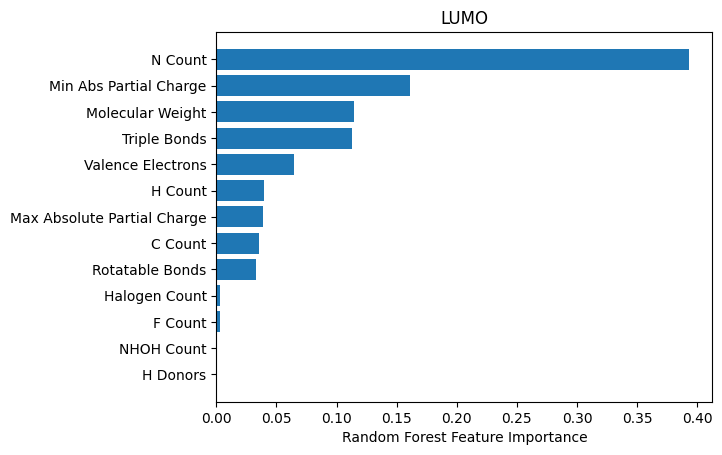

In [90]:
rfr = RandomForestRegressor(random_state=42, max_depth=20, min_samples_leaf=1, min_samples_split=2)
rfr.fit(X_train, y_train)

sorted_idx = rfr.feature_importances_.argsort()
plt.barh(list_numerical[sorted_idx], rfr.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("LUMO")

In [91]:
from sklearn.metrics import mean_squared_error

# Use the forest's predict method on the test data
predictions = rfr.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

prediction = rfr.predict(X_test)
mse = mean_squared_error(y_test, prediction)
#calculate R-squared of regression model
r_squared = rfr.score(X_test, y_test)

#view R-squared value
print("R2: ", r_squared)
rmse = mse**.5
print("MSE: ", mse)
print("RMSE: ", rmse)

Mean Absolute Error: 0.0 degrees.
R2:  0.4806744943439223
MSE:  5.051659367671692e-05
RMSE:  0.007107502632902567


In [3]:
y = data['LUMO']
X = data.loc[:, ['Molecular Weight', 'Max Absolute Partial Charge', 'Min Abs Partial Charge', 'Valence Electrons', 'NHOH Count',
         'Rotatable Bonds', 'N Count', 'Halogen Count', 'Triple Bonds']]
list_numerical = X.columns


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [8]:
from sklearn.model_selection import GridSearchCV, RepeatedKFold

param_grid = {
    "max_depth": [3,5,10,15,20,None],
    "min_samples_split": [2,5,7,10],
    "min_samples_leaf": [1,2,5]
}

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
rf = RandomForestRegressor(random_state=42)
grid_cv = GridSearchCV(rf, param_grid, scoring=score, n_jobs=-1, cv=cv).fit(X_train, y_train)

print("Param for GS", grid_cv.best_params_)
print("CV score for GS", grid_cv.best_score_)
print("Train AUC ROC Score for GS: ", naive_roc_auc_score(y_train, grid_cv.predict(X_train)))
print("Test AUC ROC Score for GS: ",naive_roc_auc_score(y_test, grid_cv.predict(X_test)))

Param for GS {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
CV score for GS 0.8405160035620285
Train AUC ROC Score for GS:  0.9451214676570885
Test AUC ROC Score for GS:  0.7990994854202401


Mean Absolute Error: 0.0 degrees.
R2:  0.4874364780358067
MSE:  4.985883206306389e-05
RMSE:  0.0070610786756036


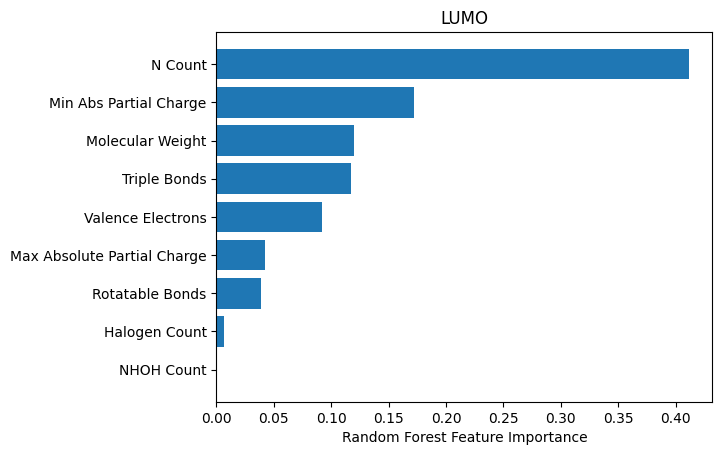

In [9]:
rfr = RandomForestRegressor(random_state=42, max_depth=None, min_samples_leaf=1, min_samples_split=5)
rfr.fit(X_train, y_train)

sorted_idx = rfr.feature_importances_.argsort()
plt.barh(list_numerical[sorted_idx], rfr.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("LUMO")

# Use the forest's predict method on the test data
predictions = rfr.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

prediction = rfr.predict(X_test)
mse = mean_squared_error(y_test, prediction)
#calculate R-squared of regression model
r_squared = rfr.score(X_test, y_test)

#view R-squared value
print("R2: ", r_squared)
rmse = mse**.5
print("MSE: ", mse)
print("RMSE: ", rmse)

In [10]:
from sklearn.inspection import permutation_importance

r = permutation_importance(rfr, X_train, y_train,
                            n_repeats=30,
                            random_state=0)

for i in r.importances_mean.argsort()[::-1]:
     if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
         print(f"{list_numerical[i]:<8}"
               f"{r.importances_mean[i]:.3f}"
               f" +/- {r.importances_std[i]:.3f}")

N Count 0.875 +/- 0.095
Min Abs Partial Charge0.296 +/- 0.022
Triple Bonds0.185 +/- 0.027
Molecular Weight0.079 +/- 0.010
Valence Electrons0.062 +/- 0.006
Max Absolute Partial Charge0.044 +/- 0.003
Rotatable Bonds0.037 +/- 0.005
Halogen Count0.006 +/- 0.001


In [11]:
y = data['LUMO']
X = data.loc[:, ['Molecular Weight', 'Max Absolute Partial Charge', 'Min Abs Partial Charge', 'Valence Electrons', 
         'Rotatable Bonds', 'N Count', 'Halogen Count', 'Triple Bonds']]
list_numerical = X.columns


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [12]:
from sklearn.model_selection import GridSearchCV, RepeatedKFold

param_grid = {
    "max_depth": [3,5,10,15,20,None],
    "min_samples_split": [2,5,7,10],
    "min_samples_leaf": [1,2,5]
}

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
rf = RandomForestRegressor(random_state=42)
grid_cv = GridSearchCV(rf, param_grid, scoring=score, n_jobs=-1, cv=cv).fit(X_train, y_train)

print("Param for GS", grid_cv.best_params_)
print("CV score for GS", grid_cv.best_score_)
print("Train AUC ROC Score for GS: ", naive_roc_auc_score(y_train, grid_cv.predict(X_train)))
print("Test AUC ROC Score for GS: ",naive_roc_auc_score(y_test, grid_cv.predict(X_test)))

Param for GS {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
CV score for GS 0.8402917882408255
Train AUC ROC Score for GS:  0.9601231859155674
Test AUC ROC Score for GS:  0.8051029159519726


Mean Absolute Error: 0.0 degrees.
R2:  0.5272450986551189
MSE:  4.5986509423882475e-05
RMSE:  0.006781335371730444


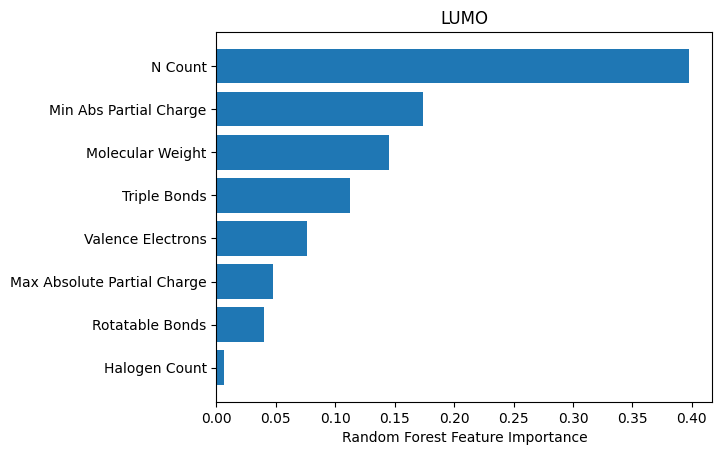

In [13]:
rfr = RandomForestRegressor(random_state=42, max_depth=None, min_samples_leaf=1, min_samples_split=2)
rfr.fit(X_train, y_train)

sorted_idx = rfr.feature_importances_.argsort()
plt.barh(list_numerical[sorted_idx], rfr.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("LUMO")

# Use the forest's predict method on the test data
predictions = rfr.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

prediction = rfr.predict(X_test)
mse = mean_squared_error(y_test, prediction)
#calculate R-squared of regression model
r_squared = rfr.score(X_test, y_test)

#view R-squared value
print("R2: ", r_squared)
rmse = mse**.5
print("MSE: ", mse)
print("RMSE: ", rmse)

In [14]:
from sklearn.inspection import permutation_importance

r = permutation_importance(rfr, X_train, y_train,
                            n_repeats=30,
                            random_state=0)

for i in r.importances_mean.argsort()[::-1]:
     if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
         print(f"{list_numerical[i]:<8}"
               f"{r.importances_mean[i]:.3f}"
               f" +/- {r.importances_std[i]:.3f}")

N Count 0.874 +/- 0.094
Min Abs Partial Charge0.314 +/- 0.022
Triple Bonds0.186 +/- 0.027
Molecular Weight0.099 +/- 0.011
Valence Electrons0.064 +/- 0.005
Max Absolute Partial Charge0.049 +/- 0.004
Rotatable Bonds0.044 +/- 0.005
Halogen Count0.006 +/- 0.001


In [15]:
y = data['LUMO']
X = data.loc[:, ['Molecular Weight', 'Max Absolute Partial Charge', 'Min Abs Partial Charge', 'Valence Electrons', 
         'Rotatable Bonds', 'N Count', 'Triple Bonds']]
list_numerical = X.columns


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

Mean Absolute Error: 0.0 degrees.
R2:  0.5275328496298655
MSE:  4.595851888824917e-05
RMSE:  0.006779271265279858


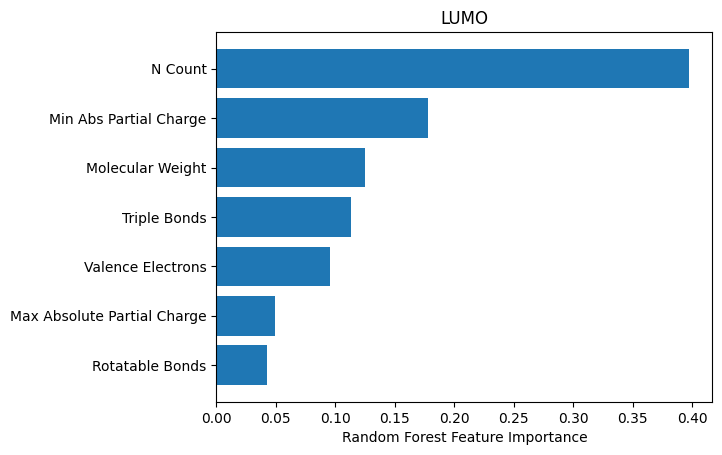

In [16]:
rfr = RandomForestRegressor(random_state=42, max_depth=None, min_samples_leaf=1, min_samples_split=2)
rfr.fit(X_train, y_train)

sorted_idx = rfr.feature_importances_.argsort()
plt.barh(list_numerical[sorted_idx], rfr.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("LUMO")

# Use the forest's predict method on the test data
predictions = rfr.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

prediction = rfr.predict(X_test)
mse = mean_squared_error(y_test, prediction)
#calculate R-squared of regression model
r_squared = rfr.score(X_test, y_test)

#view R-squared value
print("R2: ", r_squared)
rmse = mse**.5
print("MSE: ", mse)
print("RMSE: ", rmse)

In [17]:
from sklearn.inspection import permutation_importance

r = permutation_importance(rfr, X_train, y_train,
                            n_repeats=30,
                            random_state=0)

for i in r.importances_mean.argsort()[::-1]:
     if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
         print(f"{list_numerical[i]:<8}"
               f"{r.importances_mean[i]:.3f}"
               f" +/- {r.importances_std[i]:.3f}")

N Count 0.872 +/- 0.093
Min Abs Partial Charge0.324 +/- 0.024
Triple Bonds0.187 +/- 0.027
Molecular Weight0.094 +/- 0.010
Valence Electrons0.069 +/- 0.006
Max Absolute Partial Charge0.054 +/- 0.004
Rotatable Bonds0.043 +/- 0.005


In [18]:
y = data['LUMO']
X = data.loc[:, ['Molecular Weight', 'Max Absolute Partial Charge', 'Min Abs Partial Charge', 'Valence Electrons', 
         'N Count', 'Triple Bonds']]
list_numerical = X.columns


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

Mean Absolute Error: 0.0 degrees.
R2:  0.5148348705570269
MSE:  4.719369536687728e-05
RMSE:  0.0068697667621890396


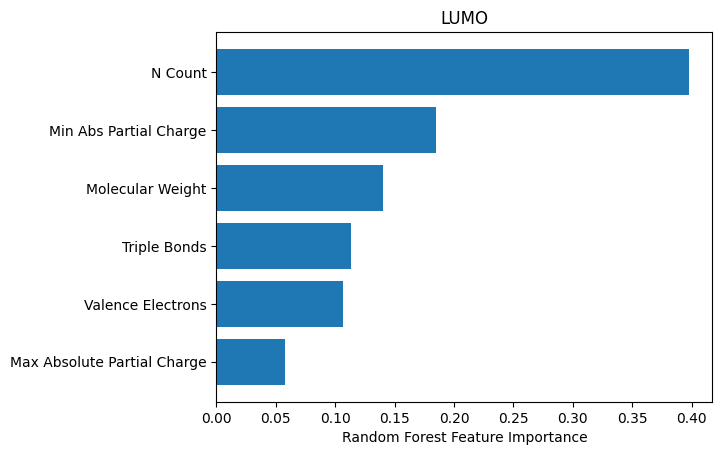

In [19]:
rfr = RandomForestRegressor(random_state=42, max_depth=None, min_samples_leaf=1, min_samples_split=2)
rfr.fit(X_train, y_train)

sorted_idx = rfr.feature_importances_.argsort()
plt.barh(list_numerical[sorted_idx], rfr.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("LUMO")

# Use the forest's predict method on the test data
predictions = rfr.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

prediction = rfr.predict(X_test)
mse = mean_squared_error(y_test, prediction)
#calculate R-squared of regression model
r_squared = rfr.score(X_test, y_test)

#view R-squared value
print("R2: ", r_squared)
rmse = mse**.5
print("MSE: ", mse)
print("RMSE: ", rmse)

HOMO - BACKWARD SELECTION

In [33]:
y = data['HOMO']
X = data.loc[:, ['Molecular Weight', 'Heavy Atom Molecular Weight', 'Max Absolute Partial Charge', 'Max Partial Charge', 
         'Min Abs Partial Charge', 'Min Partial Charge', 'Radical Electrons', 'Valence Electrons', 'NHOH Count', 'NO Count',
         'H Acceptors', 'H Donors', 'Ring Count', 'Aliphatic Rings', 'Aromatic Rings', 'Saturated Rings', 'Aromatic Carbocycles',
         'Aromatic Heterocycles', 'Heteroatoms', 'Rotatable Bonds', 'Saturated Carbocycles', 'Saturated Heterocycles', 'H Count',
         'C Count', 'N Count', 'F Count', 'Halogen Count', 'Double Bonds', 'Triple Bonds']]
list_numerical = X.columns


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

regressor_OLS = sm.OLS(endog = y_train, exog = X_train).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   HOMO   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              409.8
Date:                Mon, 03 Jul 2023   Prob (F-statistic):                   2.72e-183
Time:                        11:59:46   Log-Likelihood:                          579.91
No. Observations:                 279   AIC:                                     -1120.
Df Residuals:                     259   BIC:                                     -1047.
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Molecular Weight               -0.0028      0.002     -1.466      0.144      -0.007       0.001
Heavy Atom Molecular Weight     0.0017      0.001      1.253      0.211      -0.001       0.004
Max Absolute Partial Charge   -12.6960      2.479     -5.122      0.000     -17.577      -7.815
Max Partial Charge             12.1870      2.473      4.929      0.000       7.318      17.056
Min Abs Partial Charge        -12.3785      2.476     -4.999      0.000     -17.254      -7.503
Min Partial Charge            -12.4621      2.480     -5.025      0.000     -17.346      -7.578
Radical Electrons            1.022e-12   2.04e-13      5.022      0.000    6.21e-13    1.42e-12
Valence Electrons               0.0057      0.006      1.017      0.310      -0.005       0.017
NHOH Count                      0.0175      0.005      3.432      0.001       0.007       0.028
NO Count                       -0.0015      0.010     -0.148      0.883      -0.022       0.019
H Acceptors                    -0.0022      0.005     -0.412      0.680      -0.013       0.008
H Donors                        0.0175      0.005      3.432      0.001       0.007       0.028
Ring Count                     -0.0037      0.003     -1.074      0.284      -0.010       0.003
Aliphatic Rings             -6.415e-05      0.002     -0.029      0.977      -0.004       0.004
Aromatic Rings                 -0.0036      0.002     -1.563      0.119      -0.008       0.001
Saturated Rings                 0.0044      0.006      0.720      0.472      -0.008       0.016
Aromatic Carbocycles           -0.0054      0.002     -2.594      0.010      -0.010      -0.001
Aromatic Heterocycles           0.0018      0.002      0.979      0.328      -0.002       0.005
Heteroatoms                    -0.0045      0.012     -0.383      0.702      -0.028       0.019
Rotatable Bonds                 0.0045      0.002      1.957      0.051   -2.78e-05       0.009
Saturated Carbocycles                0          0        nan        nan           0           0
Saturated Heterocycles          0.0044      0.006      0.720      0.472      -0.008       0.016
H Count                        -0.0045      0.003     -1.381      0.169      -0.011       0.002
C Count                        -0.0079      0.016     -0.485      0.628      -0.040       0.024
N Count                        -0.0133      0.005     -2.526      0.012      -0.024      -0.003
F Count                        -0.0053      0.008     -0.634      0.527      -0.022       0.011
Halogen Count                  -0.0053      0.008     -0.634      0.527      -0.022       0.011
Double Bonds                   -0.0034      0.002     -1.465      0.144      -0.008       0.001
Triple B

In [93]:
y = data['HOMO']
X = data.loc[:, ['Molecular Weight', 'Heavy Atom Molecular Weight', 'Max Absolute Partial Charge', 'Max Partial Charge', 
         'Min Abs Partial Charge', 'Min Partial Charge', 'Radical Electrons', 'Valence Electrons', 'NHOH Count', 'NO Count',
         'H Acceptors', 'H Donors', 'Ring Count', 'Aromatic Rings', 'Saturated Rings', 'Aromatic Carbocycles',
         'Aromatic Heterocycles', 'Heteroatoms', 'Rotatable Bonds', 'Saturated Carbocycles', 'Saturated Heterocycles', 'H Count',
         'C Count', 'N Count', 'F Count', 'Halogen Count', 'Double Bonds', 'Triple Bonds']]
list_numerical = X.columns


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

regressor_OLS = sm.OLS(endog = y_train, exog = X_train).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   HOMO   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              409.8
Date:                Tue, 27 Jun 2023   Prob (F-statistic):                   2.72e-183
Time:                        11:31:44   Log-Likelihood:                          579.91
No. Observations:                 279   AIC:                                     -1120.
Df Residuals:                     259   BIC:                                     -1047.
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Molecular Weight               -0.0028      0.002     -1.466      0.144      -0.007       0.001
Heavy Atom Molecular Weight     0.0017      0.001      1.253      0.211      -0.001       0.004
Max Absolute Partial Charge   -12.6960      2.479     -5.122      0.000     -17.577      -7.815
Max Partial Charge             12.1870      2.473      4.929      0.000       7.318      17.056
Min Abs Partial Charge        -12.3785      2.476     -4.999      0.000     -17.254      -7.503
Min Partial Charge            -12.4621      2.480     -5.025      0.000     -17.346      -7.578
Radical Electrons           -5.239e-12   1.04e-12     -5.023      0.000   -7.29e-12   -3.19e-12
Valence Electrons               0.0057      0.006      1.017      0.310      -0.005       0.017
NHOH Count                      0.0175      0.005      3.432      0.001       0.007       0.028
NO Count                       -0.0015      0.010     -0.148      0.883      -0.022       0.019
H Acceptors                    -0.0022      0.005     -0.412      0.680      -0.013       0.008
H Donors                        0.0175      0.005      3.432      0.001       0.007       0.028
Ring Count                     -0.0037      0.005     -0.705      0.482      -0.014       0.007
Aromatic Rings                 -0.0036      0.003     -1.379      0.169      -0.009       0.002
Saturated Rings                 0.0044      0.006      0.720      0.472      -0.008       0.016
Aromatic Carbocycles           -0.0054      0.002     -2.442      0.015      -0.010      -0.001
Aromatic Heterocycles           0.0018      0.002      0.968      0.334      -0.002       0.006
Heteroatoms                    -0.0045      0.012     -0.383      0.702      -0.028       0.019
Rotatable Bonds                 0.0045      0.002      1.957      0.051   -2.78e-05       0.009
Saturated Carbocycles       -3.698e-16   8.24e-17     -4.490      0.000   -5.32e-16   -2.08e-16
Saturated Heterocycles          0.0044      0.006      0.720      0.472      -0.008       0.016
H Count                        -0.0045      0.003     -1.381      0.169      -0.011       0.002
C Count                        -0.0079      0.016     -0.485      0.628      -0.040       0.024
N Count                        -0.0133      0.005     -2.526      0.012      -0.024      -0.003
F Count                        -0.0053      0.008     -0.634      0.527      -0.022       0.011
Halogen Count                  -0.0053      0.008     -0.634      0.527      -0.022       0.011
Double Bonds                   -0.0034      0.002     -1.465      0.144      -0.008       0.001
Triple Bonds                   -0.0093      0.005     -1.726      0.086      -0.020       0.001
========

In [94]:
y = data['HOMO']
X = data.loc[:, ['Molecular Weight', 'Heavy Atom Molecular Weight', 'Max Absolute Partial Charge', 'Max Partial Charge', 
         'Min Abs Partial Charge', 'Min Partial Charge', 'Radical Electrons', 'Valence Electrons', 'NHOH Count',
         'H Acceptors', 'H Donors', 'Ring Count', 'Aromatic Rings', 'Saturated Rings', 'Aromatic Carbocycles',
         'Aromatic Heterocycles', 'Heteroatoms', 'Rotatable Bonds', 'Saturated Carbocycles', 'Saturated Heterocycles', 'H Count',
         'C Count', 'N Count', 'F Count', 'Halogen Count', 'Double Bonds', 'Triple Bonds']]
list_numerical = X.columns


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

regressor_OLS = sm.OLS(endog = y_train, exog = X_train).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   HOMO   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              409.8
Date:                Tue, 27 Jun 2023   Prob (F-statistic):                   2.72e-183
Time:                        11:32:18   Log-Likelihood:                          579.91
No. Observations:                 279   AIC:                                     -1120.
Df Residuals:                     259   BIC:                                     -1047.
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Molecular Weight               -0.0027      0.001     -2.068      0.040      -0.005      -0.000
Heavy Atom Molecular Weight     0.0017      0.001      1.251      0.212      -0.001       0.004
Max Absolute Partial Charge   -12.6960      2.479     -5.122      0.000     -17.577      -7.815
Max Partial Charge             12.1870      2.473      4.929      0.000       7.318      17.056
Min Abs Partial Charge        -12.3785      2.476     -4.999      0.000     -17.254      -7.503
Min Partial Charge            -12.4621      2.480     -5.025      0.000     -17.346      -7.578
Radical Electrons           -3.312e-12   6.59e-13     -5.023      0.000   -4.61e-12   -2.01e-12
Valence Electrons               0.0055      0.004      1.268      0.206      -0.003       0.014
NHOH Count                      0.0175      0.005      3.432      0.001       0.007       0.028
H Acceptors                    -0.0022      0.005     -0.412      0.680      -0.013       0.008
H Donors                        0.0175      0.005      3.432      0.001       0.007       0.028
Ring Count                     -0.0037      0.005     -0.705      0.482      -0.014       0.007
Aromatic Rings                 -0.0036      0.003     -1.379      0.169      -0.009       0.002
Saturated Rings                 0.0044      0.006      0.720      0.472      -0.008       0.016
Aromatic Carbocycles           -0.0054      0.002     -2.442      0.015      -0.010      -0.001
Aromatic Heterocycles           0.0018      0.002      0.968      0.334      -0.002       0.006
Heteroatoms                    -0.0065      0.025     -0.260      0.795      -0.055       0.042
Rotatable Bonds                 0.0045      0.002      1.957      0.051   -2.78e-05       0.009
Saturated Carbocycles        4.999e-15   9.95e-16      5.023      0.000    3.04e-15    6.96e-15
Saturated Heterocycles          0.0044      0.006      0.720      0.472      -0.008       0.016
H Count                        -0.0044      0.003     -1.653      0.100      -0.010       0.001
C Count                        -0.0083      0.019     -0.440      0.661      -0.045       0.029
N Count                        -0.0133      0.005     -2.525      0.012      -0.024      -0.003
F Count                        -0.0046      0.004     -1.033      0.302      -0.013       0.004
Halogen Count                  -0.0046      0.004     -1.033      0.302      -0.013       0.004
Double Bonds                   -0.0034      0.002     -1.465      0.144      -0.008       0.001
Triple Bonds                   -0.0093      0.005     -1.726      0.086      -0.020       0.001
==============================================================================
Omnibus:                 

In [95]:
y = data['HOMO']
X = data.loc[:, ['Molecular Weight', 'Heavy Atom Molecular Weight', 'Max Absolute Partial Charge', 'Max Partial Charge', 
         'Min Abs Partial Charge', 'Min Partial Charge', 'Radical Electrons', 'Valence Electrons', 'NHOH Count',
         'H Acceptors', 'H Donors', 'Ring Count', 'Aromatic Rings', 'Saturated Rings', 'Aromatic Carbocycles',
         'Aromatic Heterocycles', 'Rotatable Bonds', 'Saturated Carbocycles', 'Saturated Heterocycles', 'H Count',
         'C Count', 'N Count', 'F Count', 'Halogen Count', 'Double Bonds', 'Triple Bonds']]
list_numerical = X.columns


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

regressor_OLS = sm.OLS(endog = y_train, exog = X_train).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   HOMO   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              433.0
Date:                Tue, 27 Jun 2023   Prob (F-statistic):                   1.33e-184
Time:                        11:33:43   Log-Likelihood:                          579.87
No. Observations:                 279   AIC:                                     -1122.
Df Residuals:                     260   BIC:                                     -1053.
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Molecular Weight               -0.0024      0.001     -4.623      0.000      -0.003      -0.001
Heavy Atom Molecular Weight     0.0014      0.000      2.847      0.005       0.000       0.002
Max Absolute Partial Charge   -12.6721      2.472     -5.125      0.000     -17.541      -7.804
Max Partial Charge             12.1639      2.467      4.931      0.000       7.307      17.021
Min Abs Partial Charge        -12.3564      2.470     -5.002      0.000     -17.220      -7.492
Min Partial Charge            -12.4385      2.474     -5.028      0.000     -17.310      -7.567
Radical Electrons            4.603e-12   9.16e-13      5.025      0.000     2.8e-12    6.41e-12
Valence Electrons               0.0044      0.001      4.521      0.000       0.002       0.006
NHOH Count                      0.0178      0.005      3.564      0.000       0.008       0.028
H Acceptors                    -0.0016      0.005     -0.331      0.741      -0.011       0.008
H Donors                        0.0178      0.005      3.564      0.000       0.008       0.028
Ring Count                     -0.0038      0.005     -0.721      0.472      -0.014       0.007
Aromatic Rings                 -0.0036      0.003     -1.418      0.157      -0.009       0.001
Saturated Rings                 0.0046      0.006      0.770      0.442      -0.007       0.016
Aromatic Carbocycles           -0.0056      0.002     -2.636      0.009      -0.010      -0.001
Aromatic Heterocycles           0.0019      0.002      1.038      0.300      -0.002       0.006
Rotatable Bonds                 0.0045      0.002      1.945      0.053   -5.48e-05       0.009
Saturated Carbocycles       -1.606e-15   3.14e-16     -5.119      0.000   -2.22e-15   -9.89e-16
Saturated Heterocycles          0.0046      0.006      0.770      0.442      -0.007       0.016
H Count                        -0.0037      0.001     -3.813      0.000      -0.006      -0.002
C Count                        -0.0035      0.003     -0.997      0.320      -0.010       0.003
N Count                        -0.0145      0.002     -7.015      0.000      -0.019      -0.010
F Count                        -0.0038      0.003     -1.161      0.247      -0.010       0.003
Halogen Count                  -0.0038      0.003     -1.161      0.247      -0.010       0.003
Double Bonds                   -0.0033      0.002     -1.447      0.149      -0.008       0.001
Triple Bonds                   -0.0096      0.005     -1.866      0.063      -0.020       0.001
==============================================================================
Omnibus:                       22.787   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Ja

In [96]:
y = data['HOMO']
X = data.loc[:, ['Molecular Weight', 'Heavy Atom Molecular Weight', 'Max Absolute Partial Charge', 'Max Partial Charge', 
         'Min Abs Partial Charge', 'Min Partial Charge', 'Radical Electrons', 'Valence Electrons', 'NHOH Count',
         'H Donors', 'Ring Count', 'Aromatic Rings', 'Saturated Rings', 'Aromatic Carbocycles',
         'Aromatic Heterocycles', 'Rotatable Bonds', 'Saturated Carbocycles', 'Saturated Heterocycles', 'H Count',
         'C Count', 'N Count', 'F Count', 'Halogen Count', 'Double Bonds', 'Triple Bonds']]
list_numerical = X.columns


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

regressor_OLS = sm.OLS(endog = y_train, exog = X_train).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   HOMO   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              458.6
Date:                Tue, 27 Jun 2023   Prob (F-statistic):                   6.47e-186
Time:                        11:34:07   Log-Likelihood:                          579.81
No. Observations:                 279   AIC:                                     -1124.
Df Residuals:                     261   BIC:                                     -1058.
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Molecular Weight               -0.0023      0.000     -5.026      0.000      -0.003      -0.001
Heavy Atom Molecular Weight     0.0013      0.000      3.061      0.002       0.000       0.002
Max Absolute Partial Charge   -12.6605      2.468     -5.130      0.000     -17.520      -7.801
Max Partial Charge             12.1593      2.462      4.938      0.000       7.311      17.008
Min Abs Partial Charge        -12.3510      2.466     -5.009      0.000     -17.206      -7.495
Min Partial Charge            -12.4259      2.469     -5.032      0.000     -17.288      -7.563
Radical Electrons           -1.836e-12   3.65e-13     -5.030      0.000   -2.56e-12   -1.12e-12
Valence Electrons               0.0042      0.001      6.153      0.000       0.003       0.005
NHOH Count                      0.0182      0.005      3.803      0.000       0.009       0.028
H Donors                        0.0182      0.005      3.803      0.000       0.009       0.028
Ring Count                     -0.0037      0.005     -0.698      0.486      -0.014       0.007
Aromatic Rings                 -0.0038      0.003     -1.501      0.135      -0.009       0.001
Saturated Rings                 0.0047      0.006      0.786      0.433      -0.007       0.016
Aromatic Carbocycles           -0.0055      0.002     -2.632      0.009      -0.010      -0.001
Aromatic Heterocycles           0.0018      0.002      0.987      0.325      -0.002       0.005
Rotatable Bonds                 0.0043      0.002      1.924      0.055      -0.000       0.009
Saturated Carbocycles         3.62e-15   7.17e-16      5.049      0.000    2.21e-15    5.03e-15
Saturated Heterocycles          0.0047      0.006      0.786      0.433      -0.007       0.016
H Count                        -0.0036      0.001     -4.150      0.000      -0.005      -0.002
C Count                        -0.0025      0.002     -1.210      0.227      -0.007       0.002
N Count                        -0.0147      0.002     -7.478      0.000      -0.019      -0.011
F Count                        -0.0030      0.002     -1.309      0.192      -0.008       0.002
Halogen Count                  -0.0030      0.002     -1.309      0.192      -0.008       0.002
Double Bonds                   -0.0029      0.002     -1.492      0.137      -0.007       0.001
Triple Bonds                   -0.0099      0.005     -1.937      0.054      -0.020       0.000
==============================================================================
Omnibus:                       22.994   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.674
Skew:                          -0.550   Prob(JB):          

In [97]:
y = data['HOMO']
X = data.loc[:, ['Molecular Weight', 'Heavy Atom Molecular Weight', 'Max Absolute Partial Charge', 'Max Partial Charge', 
         'Min Abs Partial Charge', 'Min Partial Charge', 'Radical Electrons', 'Valence Electrons', 'NHOH Count',
         'H Donors', 'Aromatic Rings', 'Saturated Rings', 'Aromatic Carbocycles',
         'Aromatic Heterocycles', 'Rotatable Bonds', 'Saturated Carbocycles', 'Saturated Heterocycles', 'H Count',
         'C Count', 'N Count', 'F Count', 'Halogen Count', 'Double Bonds', 'Triple Bonds']]
list_numerical = X.columns


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

regressor_OLS = sm.OLS(endog = y_train, exog = X_train).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   HOMO   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              486.5
Date:                Tue, 27 Jun 2023   Prob (F-statistic):                   3.68e-187
Time:                        11:34:43   Log-Likelihood:                          579.55
No. Observations:                 279   AIC:                                     -1125.
Df Residuals:                     262   BIC:                                     -1063.
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Molecular Weight               -0.0022      0.000     -5.087      0.000      -0.003      -0.001
Heavy Atom Molecular Weight     0.0012      0.000      3.114      0.002       0.000       0.002
Max Absolute Partial Charge   -12.5676      2.462     -5.105      0.000     -17.415      -7.720
Max Partial Charge             12.0605      2.456      4.911      0.000       7.225      16.896
Min Abs Partial Charge        -12.2456      2.459     -4.980      0.000     -17.087      -7.404
Min Partial Charge            -12.3297      2.463     -5.006      0.000     -17.180      -7.480
Radical Electrons            1.236e-12   2.47e-13      5.006      0.000     7.5e-13    1.72e-12
Valence Electrons               0.0042      0.001      6.174      0.000       0.003       0.005
NHOH Count                      0.0177      0.005      3.743      0.000       0.008       0.027
H Donors                        0.0177      0.005      3.743      0.000       0.008       0.027
Aromatic Rings                 -0.0038      0.003     -1.524      0.129      -0.009       0.001
Saturated Rings                 0.0060      0.006      1.072      0.285      -0.005       0.017
Aromatic Carbocycles           -0.0056      0.002     -2.669      0.008      -0.010      -0.001
Aromatic Heterocycles           0.0018      0.002      0.996      0.320      -0.002       0.005
Rotatable Bonds                 0.0056      0.001      4.865      0.000       0.003       0.008
Saturated Carbocycles       -1.606e-15   3.28e-16     -4.896      0.000   -2.25e-15    -9.6e-16
Saturated Heterocycles          0.0060      0.006      1.072      0.285      -0.005       0.017
H Count                        -0.0033      0.001     -4.243      0.000      -0.005      -0.002
C Count                        -0.0032      0.002     -1.731      0.085      -0.007       0.000
N Count                        -0.0150      0.002     -7.829      0.000      -0.019      -0.011
F Count                        -0.0025      0.002     -1.141      0.255      -0.007       0.002
Halogen Count                  -0.0025      0.002     -1.141      0.255      -0.007       0.002
Double Bonds                   -0.0027      0.002     -1.404      0.162      -0.006       0.001
Triple Bonds                   -0.0072      0.003     -2.157      0.032      -0.014      -0.001
==============================================================================
Omnibus:                       21.584   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.560
Skew:                          -0.522   Prob(JB):                     1.40e-07
Kurtosis:                       4.275   Cond. No.                     1.21e+

In [98]:
y = data['HOMO']
X = data.loc[:, ['Molecular Weight', 'Heavy Atom Molecular Weight', 'Max Absolute Partial Charge', 'Max Partial Charge', 
         'Min Abs Partial Charge', 'Min Partial Charge', 'Radical Electrons', 'Valence Electrons', 'NHOH Count',
         'H Donors', 'Aromatic Rings', 'Saturated Rings', 'Aromatic Carbocycles',
         'Rotatable Bonds', 'Saturated Carbocycles', 'Saturated Heterocycles', 'H Count',
         'C Count', 'N Count', 'F Count', 'Halogen Count', 'Double Bonds', 'Triple Bonds']]
list_numerical = X.columns


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

regressor_OLS = sm.OLS(endog = y_train, exog = X_train).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   HOMO   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              486.5
Date:                Tue, 27 Jun 2023   Prob (F-statistic):                   3.68e-187
Time:                        11:35:17   Log-Likelihood:                          579.55
No. Observations:                 279   AIC:                                     -1125.
Df Residuals:                     262   BIC:                                     -1063.
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Molecular Weight               -0.0022      0.000     -5.087      0.000      -0.003      -0.001
Heavy Atom Molecular Weight     0.0012      0.000      3.114      0.002       0.000       0.002
Max Absolute Partial Charge   -12.5676      2.462     -5.105      0.000     -17.415      -7.720
Max Partial Charge             12.0605      2.456      4.911      0.000       7.225      16.896
Min Abs Partial Charge        -12.2456      2.459     -4.980      0.000     -17.087      -7.404
Min Partial Charge            -12.3297      2.463     -5.006      0.000     -17.180      -7.480
Radical Electrons           -3.324e-13   6.67e-14     -4.983      0.000   -4.64e-13   -2.01e-13
Valence Electrons               0.0042      0.001      6.174      0.000       0.003       0.005
NHOH Count                      0.0177      0.005      3.743      0.000       0.008       0.027
H Donors                        0.0177      0.005      3.743      0.000       0.008       0.027
Aromatic Rings                 -0.0021      0.004     -0.543      0.588      -0.010       0.005
Saturated Rings                 0.0060      0.006      1.072      0.285      -0.005       0.017
Aromatic Carbocycles           -0.0074      0.003     -2.491      0.013      -0.013      -0.002
Rotatable Bonds                 0.0056      0.001      4.865      0.000       0.003       0.008
Saturated Carbocycles        5.061e-13   1.01e-13      5.006      0.000    3.07e-13    7.05e-13
Saturated Heterocycles          0.0060      0.006      1.072      0.285      -0.005       0.017
H Count                        -0.0033      0.001     -4.243      0.000      -0.005      -0.002
C Count                        -0.0032      0.002     -1.731      0.085      -0.007       0.000
N Count                        -0.0150      0.002     -7.829      0.000      -0.019      -0.011
F Count                        -0.0025      0.002     -1.141      0.255      -0.007       0.002
Halogen Count                  -0.0025      0.002     -1.141      0.255      -0.007       0.002
Double Bonds                   -0.0027      0.002     -1.404      0.162      -0.006       0.001
Triple Bonds                   -0.0072      0.003     -2.157      0.032      -0.014      -0.001
==============================================================================
Omnibus:                       21.584   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.560
Skew:                          -0.522   Prob(JB):                     1.40e-07
Kurtosis:                       4.275   Cond. No.                     7.22e+20
==============================================================================

Notes:
[1] R²

In [99]:
y = data['HOMO']
X = data.loc[:, ['Molecular Weight', 'Heavy Atom Molecular Weight', 'Max Absolute Partial Charge', 'Max Partial Charge', 
         'Min Abs Partial Charge', 'Min Partial Charge', 'Radical Electrons', 'Valence Electrons', 'NHOH Count',
         'H Donors', 'Saturated Rings', 'Aromatic Carbocycles',
         'Rotatable Bonds', 'Saturated Carbocycles', 'Saturated Heterocycles', 'H Count',
         'C Count', 'N Count', 'F Count', 'Halogen Count', 'Double Bonds', 'Triple Bonds']]
list_numerical = X.columns


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

regressor_OLS = sm.OLS(endog = y_train, exog = X_train).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   HOMO   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              518.2
Date:                Tue, 27 Jun 2023   Prob (F-statistic):                   1.84e-188
Time:                        11:35:46   Log-Likelihood:                          579.40
No. Observations:                 279   AIC:                                     -1127.
Df Residuals:                     263   BIC:                                     -1069.
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Molecular Weight               -0.0021      0.000     -5.200      0.000      -0.003      -0.001
Heavy Atom Molecular Weight     0.0010      0.000      3.376      0.001       0.000       0.002
Max Absolute Partial Charge   -12.5807      2.459     -5.117      0.000     -17.422      -7.740
Max Partial Charge             12.0824      2.452      4.927      0.000       7.254      16.911
Min Abs Partial Charge        -12.2673      2.455     -4.996      0.000     -17.102      -7.433
Min Partial Charge            -12.3398      2.460     -5.017      0.000     -17.183      -7.496
Radical Electrons            2.546e-12   5.08e-13      5.017      0.000    1.55e-12    3.55e-12
Valence Electrons               0.0042      0.001      6.437      0.000       0.003       0.006
NHOH Count                      0.0182      0.005      3.901      0.000       0.009       0.027
H Donors                        0.0182      0.005      3.901      0.000       0.009       0.027
Saturated Rings                 0.0062      0.006      1.103      0.271      -0.005       0.017
Aromatic Carbocycles           -0.0077      0.003     -2.679      0.008      -0.013      -0.002
Rotatable Bonds                 0.0057      0.001      5.005      0.000       0.003       0.008
Saturated Carbocycles        1.284e-13   2.56e-14      5.017      0.000     7.8e-14    1.79e-13
Saturated Heterocycles          0.0062      0.006      1.103      0.271      -0.005       0.017
H Count                        -0.0031      0.001     -4.458      0.000      -0.005      -0.002
C Count                        -0.0036      0.002     -2.167      0.031      -0.007      -0.000
N Count                        -0.0153      0.002     -8.369      0.000      -0.019      -0.012
F Count                        -0.0023      0.002     -1.074      0.284      -0.007       0.002
Halogen Count                  -0.0023      0.002     -1.074      0.284      -0.007       0.002
Double Bonds                   -0.0020      0.001     -1.387      0.167      -0.005       0.001
Triple Bonds                   -0.0061      0.003     -2.287      0.023      -0.011      -0.001
==============================================================================
Omnibus:                       21.840   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.936
Skew:                          -0.527   Prob(JB):                     1.16e-07
Kurtosis:                       4.279   Cond. No.                     5.49e+20
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Sta

In [101]:
y = data['HOMO']
X = data.loc[:, ['Molecular Weight', 'Heavy Atom Molecular Weight', 'Max Absolute Partial Charge', 'Max Partial Charge', 
         'Min Abs Partial Charge', 'Min Partial Charge', 'Radical Electrons', 'Valence Electrons', 'NHOH Count',
         'H Donors', 'Saturated Rings', 'Aromatic Carbocycles',
         'Rotatable Bonds', 'Saturated Carbocycles', 'Saturated Heterocycles', 'H Count',
         'C Count', 'N Count', 'Halogen Count', 'Double Bonds', 'Triple Bonds']]
list_numerical = X.columns


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

regressor_OLS = sm.OLS(endog = y_train, exog = X_train).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   HOMO   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              518.2
Date:                Tue, 27 Jun 2023   Prob (F-statistic):                   1.84e-188
Time:                        11:36:48   Log-Likelihood:                          579.40
No. Observations:                 279   AIC:                                     -1127.
Df Residuals:                     263   BIC:                                     -1069.
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Molecular Weight               -0.0021      0.000     -5.200      0.000      -0.003      -0.001
Heavy Atom Molecular Weight     0.0010      0.000      3.376      0.001       0.000       0.002
Max Absolute Partial Charge   -12.5807      2.459     -5.117      0.000     -17.422      -7.740
Max Partial Charge             12.0824      2.452      4.927      0.000       7.254      16.911
Min Abs Partial Charge        -12.2673      2.455     -4.996      0.000     -17.102      -7.433
Min Partial Charge            -12.3398      2.460     -5.017      0.000     -17.183      -7.496
Radical Electrons           -6.436e-13   1.28e-13     -5.015      0.000   -8.96e-13   -3.91e-13
Valence Electrons               0.0042      0.001      6.437      0.000       0.003       0.006
NHOH Count                      0.0182      0.005      3.901      0.000       0.009       0.027
H Donors                        0.0182      0.005      3.901      0.000       0.009       0.027
Saturated Rings                 0.0062      0.006      1.103      0.271      -0.005       0.017
Aromatic Carbocycles           -0.0077      0.003     -2.679      0.008      -0.013      -0.002
Rotatable Bonds                 0.0057      0.001      5.005      0.000       0.003       0.008
Saturated Carbocycles        3.777e-14   7.53e-15      5.016      0.000    2.29e-14    5.26e-14
Saturated Heterocycles          0.0062      0.006      1.103      0.271      -0.005       0.017
H Count                        -0.0031      0.001     -4.458      0.000      -0.005      -0.002
C Count                        -0.0036      0.002     -2.167      0.031      -0.007      -0.000
N Count                        -0.0153      0.002     -8.369      0.000      -0.019      -0.012
Halogen Count                  -0.0046      0.004     -1.074      0.284      -0.013       0.004
Double Bonds                   -0.0020      0.001     -1.387      0.167      -0.005       0.001
Triple Bonds                   -0.0061      0.003     -2.287      0.023      -0.011      -0.001
==============================================================================
Omnibus:                       21.840   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.936
Skew:                          -0.527   Prob(JB):                     1.16e-07
Kurtosis:                       4.279   Cond. No.                     1.91e+21
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The sma

In [102]:
y = data['HOMO']
X = data.loc[:, ['Molecular Weight', 'Heavy Atom Molecular Weight', 'Max Absolute Partial Charge', 'Max Partial Charge', 
         'Min Abs Partial Charge', 'Min Partial Charge', 'Radical Electrons', 'Valence Electrons', 'NHOH Count',
         'H Donors', 'Saturated Rings', 'Aromatic Carbocycles',
         'Rotatable Bonds', 'Saturated Carbocycles', 'Saturated Heterocycles', 'H Count',
         'C Count', 'N Count', 'Double Bonds', 'Triple Bonds']]
list_numerical = X.columns


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

regressor_OLS = sm.OLS(endog = y_train, exog = X_train).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   HOMO   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              552.4
Date:                Tue, 27 Jun 2023   Prob (F-statistic):                   1.37e-189
Time:                        11:37:14   Log-Likelihood:                          578.78
No. Observations:                 279   AIC:                                     -1128.
Df Residuals:                     264   BIC:                                     -1073.
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Molecular Weight               -0.0020      0.000     -5.153      0.000      -0.003      -0.001
Heavy Atom Molecular Weight     0.0009      0.000      3.200      0.002       0.000       0.002
Max Absolute Partial Charge   -12.7276      2.455     -5.183      0.000     -17.562      -7.893
Max Partial Charge             12.1298      2.453      4.946      0.000       7.301      16.959
Min Abs Partial Charge        -12.3156      2.456     -5.016      0.000     -17.151      -7.481
Min Partial Charge            -12.4898      2.457     -5.084      0.000     -17.327      -7.653
Radical Electrons            1.954e-12   3.86e-13      5.067      0.000    1.19e-12    2.71e-12
Valence Electrons               0.0039      0.001      6.578      0.000       0.003       0.005
NHOH Count                      0.0182      0.005      3.914      0.000       0.009       0.027
H Donors                        0.0182      0.005      3.914      0.000       0.009       0.027
Saturated Rings                 0.0070      0.006      1.265      0.207      -0.004       0.018
Aromatic Carbocycles           -0.0079      0.003     -2.753      0.006      -0.014      -0.002
Rotatable Bonds                 0.0059      0.001      5.256      0.000       0.004       0.008
Saturated Carbocycles        7.669e-15   1.51e-15      5.069      0.000    4.69e-15    1.06e-14
Saturated Heterocycles          0.0070      0.006      1.265      0.207      -0.004       0.018
H Count                        -0.0029      0.001     -4.352      0.000      -0.004      -0.002
C Count                        -0.0032      0.002     -1.956      0.052      -0.006    2.15e-05
N Count                        -0.0146      0.002     -8.573      0.000      -0.018      -0.011
Double Bonds                   -0.0018      0.001     -1.250      0.212      -0.005       0.001
Triple Bonds                   -0.0059      0.003     -2.230      0.027      -0.011      -0.001
==============================================================================
Omnibus:                       21.168   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.985
Skew:                          -0.513   Prob(JB):                     1.87e-07
Kurtosis:                       4.271   Cond. No.                     9.85e+21
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 2.51e-36. This might indicate that there are
strong multicollinearity proble

In [103]:
y = data['HOMO']
X = data.loc[:, ['Molecular Weight', 'Heavy Atom Molecular Weight', 'Max Absolute Partial Charge', 'Max Partial Charge', 
         'Min Abs Partial Charge', 'Min Partial Charge', 'Radical Electrons', 'Valence Electrons', 'NHOH Count',
         'H Donors', 'Saturated Rings', 'Aromatic Carbocycles',
         'Rotatable Bonds', 'Saturated Carbocycles', 'Saturated Heterocycles', 'H Count',
         'C Count', 'N Count', 'Triple Bonds']]
list_numerical = X.columns


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

regressor_OLS = sm.OLS(endog = y_train, exog = X_train).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   HOMO   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              590.5
Date:                Tue, 27 Jun 2023   Prob (F-statistic):                   1.20e-190
Time:                        11:37:41   Log-Likelihood:                          577.96
No. Observations:                 279   AIC:                                     -1128.
Df Residuals:                     265   BIC:                                     -1077.
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Molecular Weight               -0.0018      0.000     -5.000      0.000      -0.003      -0.001
Heavy Atom Molecular Weight     0.0009      0.000      3.031      0.003       0.000       0.001
Max Absolute Partial Charge   -12.7706      2.458     -5.196      0.000     -17.610      -7.931
Max Partial Charge             12.1963      2.455      4.969      0.000       7.363      17.029
Min Abs Partial Charge        -12.3964      2.457     -5.045      0.000     -17.235      -7.558
Min Partial Charge            -12.5396      2.459     -5.100      0.000     -17.381      -7.698
Radical Electrons           -6.313e-13   1.24e-13     -5.078      0.000   -8.76e-13   -3.87e-13
Valence Electrons               0.0037      0.001      6.569      0.000       0.003       0.005
NHOH Count                      0.0191      0.005      4.140      0.000       0.010       0.028
H Donors                        0.0191      0.005      4.140      0.000       0.010       0.028
Saturated Rings                 0.0049      0.005      0.924      0.356      -0.006       0.015
Aromatic Carbocycles           -0.0066      0.003     -2.464      0.014      -0.012      -0.001
Rotatable Bonds                 0.0057      0.001      5.108      0.000       0.003       0.008
Saturated Carbocycles       -5.905e-16    1.1e-16     -5.365      0.000   -8.07e-16   -3.74e-16
Saturated Heterocycles          0.0049      0.005      0.924      0.356      -0.006       0.015
H Count                        -0.0027      0.001     -4.170      0.000      -0.004      -0.001
C Count                        -0.0033      0.002     -2.004      0.046      -0.006   -5.67e-05
N Count                        -0.0144      0.002     -8.488      0.000      -0.018      -0.011
Triple Bonds                   -0.0057      0.003     -2.153      0.032      -0.011      -0.000
==============================================================================
Omnibus:                       20.790   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.790
Skew:                          -0.527   Prob(JB):                     5.60e-07
Kurtosis:                       4.169   Cond. No.                     2.19e+23
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 5.09e-39. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [104]:
y = data['HOMO']
X = data.loc[:, ['Molecular Weight', 'Heavy Atom Molecular Weight', 'Max Absolute Partial Charge', 'Max Partial Charge', 
         'Min Abs Partial Charge', 'Min Partial Charge', 'Radical Electrons', 'Valence Electrons', 'NHOH Count',
         'H Donors', 'Aromatic Carbocycles',
         'Rotatable Bonds', 'Saturated Carbocycles', 'Saturated Heterocycles', 'H Count',
         'C Count', 'N Count', 'Triple Bonds']]
list_numerical = X.columns


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

regressor_OLS = sm.OLS(endog = y_train, exog = X_train).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   HOMO   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              590.5
Date:                Tue, 27 Jun 2023   Prob (F-statistic):                   1.20e-190
Time:                        11:38:23   Log-Likelihood:                          577.96
No. Observations:                 279   AIC:                                     -1128.
Df Residuals:                     265   BIC:                                     -1077.
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Molecular Weight               -0.0018      0.000     -5.000      0.000      -0.003      -0.001
Heavy Atom Molecular Weight     0.0009      0.000      3.031      0.003       0.000       0.001
Max Absolute Partial Charge   -12.7706      2.458     -5.196      0.000     -17.610      -7.931
Max Partial Charge             12.1963      2.455      4.969      0.000       7.363      17.029
Min Abs Partial Charge        -12.3964      2.457     -5.045      0.000     -17.235      -7.558
Min Partial Charge            -12.5396      2.459     -5.100      0.000     -17.381      -7.698
Radical Electrons            9.443e-14   1.86e-14      5.064      0.000    5.77e-14    1.31e-13
Valence Electrons               0.0037      0.001      6.569      0.000       0.003       0.005
NHOH Count                      0.0191      0.005      4.140      0.000       0.010       0.028
H Donors                        0.0191      0.005      4.140      0.000       0.010       0.028
Aromatic Carbocycles           -0.0066      0.003     -2.464      0.014      -0.012      -0.001
Rotatable Bonds                 0.0057      0.001      5.108      0.000       0.003       0.008
Saturated Carbocycles       -1.128e-14   2.21e-15     -5.096      0.000   -1.56e-14   -6.92e-15
Saturated Heterocycles          0.0098      0.011      0.924      0.356      -0.011       0.031
H Count                        -0.0027      0.001     -4.170      0.000      -0.004      -0.001
C Count                        -0.0033      0.002     -2.004      0.046      -0.006   -5.67e-05
N Count                        -0.0144      0.002     -8.488      0.000      -0.018      -0.011
Triple Bonds                   -0.0057      0.003     -2.153      0.032      -0.011      -0.000
==============================================================================
Omnibus:                       20.790   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.790
Skew:                          -0.527   Prob(JB):                     5.60e-07
Kurtosis:                       4.169   Cond. No.                     2.22e+21
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 4.94e-35. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [106]:
y = data['HOMO']
X = data.loc[:, ['Molecular Weight', 'Heavy Atom Molecular Weight', 'Max Absolute Partial Charge', 'Max Partial Charge', 
         'Min Abs Partial Charge', 'Min Partial Charge', 'Radical Electrons', 'Valence Electrons', 'NHOH Count',
         'H Donors', 'Aromatic Carbocycles', 'Rotatable Bonds', 'Saturated Carbocycles', 'H Count',
         'C Count', 'N Count', 'Triple Bonds']]
list_numerical = X.columns


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

regressor_OLS = sm.OLS(endog = y_train, exog = X_train).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   HOMO   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              636.2
Date:                Tue, 27 Jun 2023   Prob (F-statistic):                   7.15e-192
Time:                        11:38:49   Log-Likelihood:                          577.51
No. Observations:                 279   AIC:                                     -1129.
Df Residuals:                     266   BIC:                                     -1082.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Molecular Weight               -0.0018      0.000     -5.009      0.000      -0.003      -0.001
Heavy Atom Molecular Weight     0.0009      0.000      3.015      0.003       0.000       0.001
Max Absolute Partial Charge   -12.7659      2.457     -5.196      0.000     -17.604      -7.928
Max Partial Charge             12.2005      2.454      4.972      0.000       7.369      17.032
Min Abs Partial Charge        -12.4036      2.457     -5.049      0.000     -17.240      -7.567
Min Partial Charge            -12.5327      2.458     -5.098      0.000     -17.373      -7.693
Radical Electrons            3.306e-13    6.5e-14      5.085      0.000    2.03e-13    4.59e-13
Valence Electrons               0.0037      0.001      6.755      0.000       0.003       0.005
NHOH Count                      0.0197      0.005      4.335      0.000       0.011       0.029
H Donors                        0.0197      0.005      4.335      0.000       0.011       0.029
Aromatic Carbocycles           -0.0067      0.003     -2.506      0.013      -0.012      -0.001
Rotatable Bonds                 0.0056      0.001      5.068      0.000       0.003       0.008
Saturated Carbocycles        -6.58e-16   1.48e-16     -4.432      0.000    -9.5e-16   -3.66e-16
H Count                        -0.0027      0.001     -4.167      0.000      -0.004      -0.001
C Count                        -0.0035      0.002     -2.158      0.032      -0.007      -0.000
N Count                        -0.0145      0.002     -8.538      0.000      -0.018      -0.011
Triple Bonds                   -0.0059      0.003     -2.206      0.028      -0.011      -0.001
==============================================================================
Omnibus:                       20.774   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.035
Skew:                          -0.523   Prob(JB):                     4.96e-07
Kurtosis:                       4.185   Cond. No.                     2.11e+24
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 5.48e-41. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [109]:
from sklearn.model_selection import GridSearchCV, RepeatedKFold

param_grid = {
    "max_depth": [3,5,10,15,20,None],
    "min_samples_split": [2,5,7,10],
    "min_samples_leaf": [1,2,5]
}

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
rf = RandomForestRegressor(random_state=42)
grid_cv = GridSearchCV(rf, param_grid, scoring=score, n_jobs=-1, cv=cv).fit(X_train, y_train)

print("Param for GS", grid_cv.best_params_)
print("CV score for GS", grid_cv.best_score_)
print("Train AUC ROC Score for GS: ", naive_roc_auc_score(y_train, grid_cv.predict(X_train)))
print("Test AUC ROC Score for GS: ",naive_roc_auc_score(y_test, grid_cv.predict(X_test)))


Param for GS {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
CV score for GS 0.7851194721000684
Train AUC ROC Score for GS:  0.9382417700445733
Test AUC ROC Score for GS:  0.8204741379310345


Mean Absolute Error: 0.0 degrees.
R2:  0.6376689917067144
MSE:  3.237205723789304e-05
RMSE:  0.00568964473740611


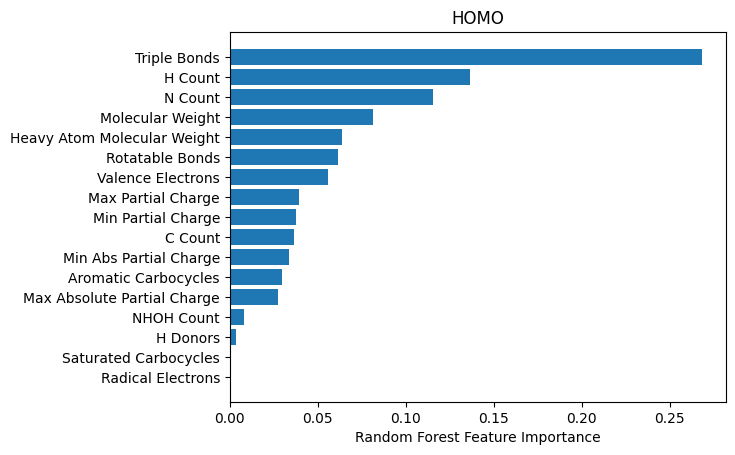

In [110]:
rfr = RandomForestRegressor(random_state=42, max_depth=15, min_samples_leaf=1, min_samples_split=2)
rfr.fit(X_train, y_train)

sorted_idx = rfr.feature_importances_.argsort()
plt.barh(list_numerical[sorted_idx], rfr.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("HOMO")
from sklearn.metrics import mean_squared_error

# Use the forest's predict method on the test data
predictions = rfr.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

prediction = rfr.predict(X_test)
mse = mean_squared_error(y_test, prediction)
#calculate R-squared of regression model
r_squared = rfr.score(X_test, y_test)

#view R-squared value
print("R2: ", r_squared)
rmse = mse**.5
print("MSE: ", mse)
print("RMSE: ", rmse)

In [114]:
y = data['HOMO']
X = data.loc[:, ['Max Absolute Partial Charge', 'Max Partial Charge', 'Min Partial Charge', 'Radical Electrons', 'Valence Electrons', 'NHOH Count',
         'Aromatic Carbocycles', 'Rotatable Bonds', 'Saturated Carbocycles', 'N Count', 'Triple Bonds']]
list_numerical = X.columns


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [115]:
from sklearn.model_selection import GridSearchCV, RepeatedKFold

param_grid = {
    "max_depth": [3,5,10,15,20,None],
    "min_samples_split": [2,5,7,10],
    "min_samples_leaf": [1,2,5]
}

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
rf = RandomForestRegressor(random_state=42)
grid_cv = GridSearchCV(rf, param_grid, scoring=score, n_jobs=-1, cv=cv).fit(X_train, y_train)

print("Param for GS", grid_cv.best_params_)
print("CV score for GS", grid_cv.best_score_)
print("Train AUC ROC Score for GS: ", naive_roc_auc_score(y_train, grid_cv.predict(X_train)))
print("Test AUC ROC Score for GS: ",naive_roc_auc_score(y_test, grid_cv.predict(X_test)))


Param for GS {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
CV score for GS 0.7931815593363959
Train AUC ROC Score for GS:  0.9415444927769723
Test AUC ROC Score for GS:  0.8230603448275862


Mean Absolute Error: 0.0 degrees.
R2:  0.6420773294902162
MSE:  3.197819924676032e-05
RMSE:  0.005654926988632154


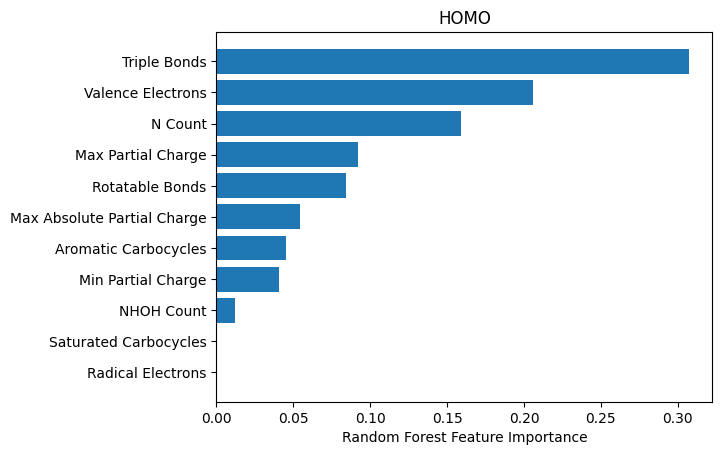

In [116]:
rfr = RandomForestRegressor(random_state=42, max_depth=20, min_samples_leaf=1, min_samples_split=2)
rfr.fit(X_train, y_train)

sorted_idx = rfr.feature_importances_.argsort()
plt.barh(list_numerical[sorted_idx], rfr.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("HOMO")
from sklearn.metrics import mean_squared_error

# Use the forest's predict method on the test data
predictions = rfr.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

prediction = rfr.predict(X_test)
mse = mean_squared_error(y_test, prediction)
#calculate R-squared of regression model
r_squared = rfr.score(X_test, y_test)

#view R-squared value
print("R2: ", r_squared)
rmse = mse**.5
print("MSE: ", mse)
print("RMSE: ", rmse)

In [24]:
y = data['HOMO']
X = data.loc[:, ['Max Absolute Partial Charge', 'Max Partial Charge', 'Min Partial Charge', 'Valence Electrons', 'NHOH Count',
         'Rotatable Bonds', 'Saturated Carbocycles', 'N Count', 'Triple Bonds']]
list_numerical = X.columns


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [25]:
from sklearn.model_selection import GridSearchCV, RepeatedKFold

param_grid = {
    "max_depth": [3,5,10,15,20,None],
    "min_samples_split": [2,5,7,10],
    "min_samples_leaf": [1,2,5]
}

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
rf = RandomForestRegressor(random_state=42)
grid_cv = GridSearchCV(rf, param_grid, scoring=score, n_jobs=-1, cv=cv).fit(X_train, y_train)

print("Param for GS", grid_cv.best_params_)
print("CV score for GS", grid_cv.best_score_)
print("Train AUC ROC Score for GS: ", naive_roc_auc_score(y_train, grid_cv.predict(X_train)))
print("Test AUC ROC Score for GS: ",naive_roc_auc_score(y_test, grid_cv.predict(X_test)))


Param for GS {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
CV score for GS 0.785440957985955
Train AUC ROC Score for GS:  0.9419204124375705
Test AUC ROC Score for GS:  0.8196120689655172


Mean Absolute Error: 0.0 degrees.
R2:  0.6274465363381709
MSE:  3.328537103861096e-05
RMSE:  0.005769347540113263


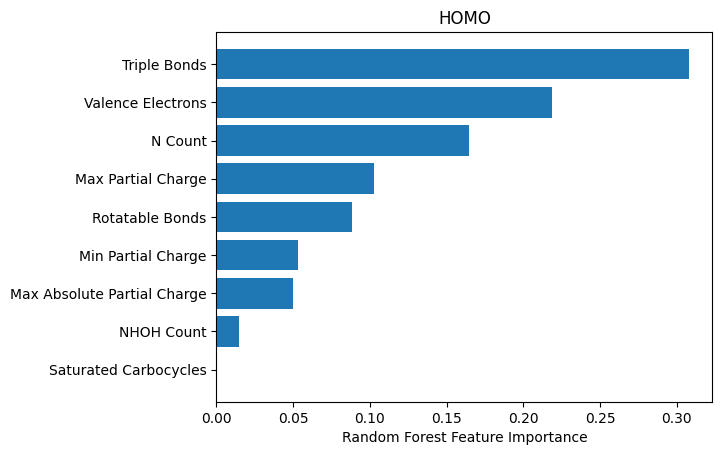

In [26]:
rfr = RandomForestRegressor(random_state=42, max_depth=20, min_samples_leaf=1, min_samples_split=2)
rfr.fit(X_train, y_train)

sorted_idx = rfr.feature_importances_.argsort()
plt.barh(list_numerical[sorted_idx], rfr.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("HOMO")
from sklearn.metrics import mean_squared_error

# Use the forest's predict method on the test data
predictions = rfr.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

prediction = rfr.predict(X_test)
mse = mean_squared_error(y_test, prediction)
#calculate R-squared of regression model
r_squared = rfr.score(X_test, y_test)

#view R-squared value
print("R2: ", r_squared)
rmse = mse**.5
print("MSE: ", mse)
print("RMSE: ", rmse)

In [27]:
from sklearn.inspection import permutation_importance

r = permutation_importance(rfr, X_train, y_train,
                            n_repeats=30,
                            random_state=0)

for i in r.importances_mean.argsort()[::-1]:
     if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
         print(f"{list_numerical[i]:<8}"
               f"{r.importances_mean[i]:.3f}"
               f" +/- {r.importances_std[i]:.3f}")

Triple Bonds0.633 +/- 0.095
Valence Electrons0.414 +/- 0.028
N Count 0.220 +/- 0.046
Max Partial Charge0.166 +/- 0.010
Rotatable Bonds0.102 +/- 0.008
Min Partial Charge0.054 +/- 0.005
Max Absolute Partial Charge0.046 +/- 0.004
NHOH Count0.016 +/- 0.002


In [43]:
y = data['HOMO']
X = data.loc[:, ['Max Absolute Partial Charge', 'Max Partial Charge', 'Min Partial Charge', 'Valence Electrons', 'NHOH Count',
         'Rotatable Bonds',  'N Count', 'Triple Bonds']]
list_numerical = X.columns


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [44]:
from sklearn.model_selection import GridSearchCV, RepeatedKFold

param_grid = {
    "max_depth": [3,5,10,15,20,None],
    "min_samples_split": [2,5,7,10],
    "min_samples_leaf": [1,2,5]
}

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
rf = RandomForestRegressor(random_state=42)
grid_cv = GridSearchCV(rf, param_grid, scoring=score, n_jobs=-1, cv=cv).fit(X_train, y_train)

print("Param for GS", grid_cv.best_params_)
print("CV score for GS", grid_cv.best_score_)
print("Train AUC ROC Score for GS: ", naive_roc_auc_score(y_train, grid_cv.predict(X_train)))
print("Test AUC ROC Score for GS: ",naive_roc_auc_score(y_test, grid_cv.predict(X_test)))


Param for GS {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
CV score for GS 0.7841567527681619
Train AUC ROC Score for GS:  0.9215670479566082
Test AUC ROC Score for GS:  0.8213362068965517


Mean Absolute Error: 0.0 degrees.
R2:  0.6244234221959937
MSE:  3.3555467778352396e-05
RMSE:  0.005792708155806954


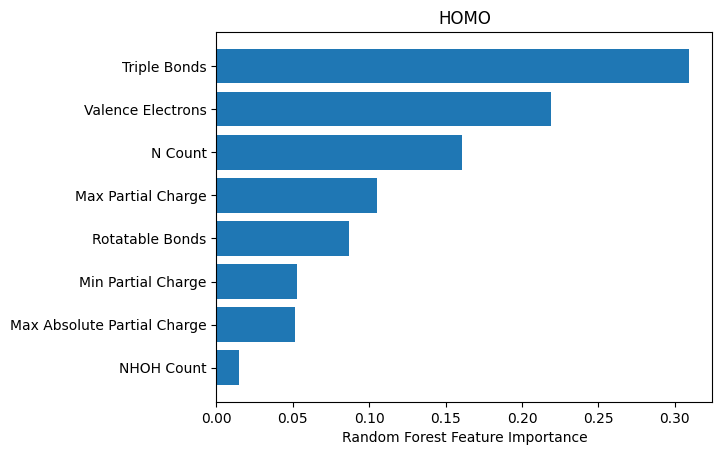

In [45]:
rfr = RandomForestRegressor(random_state=42, max_depth=20, min_samples_leaf=1, min_samples_split=2)
rfr.fit(X_train, y_train)

sorted_idx = rfr.feature_importances_.argsort()
plt.barh(list_numerical[sorted_idx], rfr.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("HOMO")
from sklearn.metrics import mean_squared_error

# Use the forest's predict method on the test data
predictions = rfr.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

prediction = rfr.predict(X_test)
mse = mean_squared_error(y_test, prediction)
#calculate R-squared of regression model
r_squared = rfr.score(X_test, y_test)

#view R-squared value
print("R2: ", r_squared)
rmse = mse**.5
print("MSE: ", mse)
print("RMSE: ", rmse)

In [46]:
from sklearn.inspection import permutation_importance

r = permutation_importance(rfr, X_train, y_train,
                            n_repeats=30,
                            random_state=0)

for i in r.importances_mean.argsort()[::-1]:
     if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
         print(f"{list_numerical[i]:<8}"
               f"{r.importances_mean[i]:.3f}"
               f" +/- {r.importances_std[i]:.3f}")

Triple Bonds0.643 +/- 0.093
Valence Electrons0.412 +/- 0.028
N Count 0.208 +/- 0.043
Max Partial Charge0.168 +/- 0.011
Rotatable Bonds0.100 +/- 0.007
Min Partial Charge0.052 +/- 0.005
Max Absolute Partial Charge0.050 +/- 0.005
NHOH Count0.017 +/- 0.002


In [34]:
y = data['HOMO']
X = data.loc[:, ['Max Absolute Partial Charge', 'Max Partial Charge', 'Min Partial Charge', 'Valence Electrons', 'NHOH Count',
         'Rotatable Bonds', 'N Count', 'Triple Bonds']]
list_numerical = X.columns


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
regressor_OLS = sm.OLS(endog = y_train, exog = X_train).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   HOMO   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              764.5
Date:                Mon, 03 Jul 2023   Prob (F-statistic):                   4.27e-181
Time:                        12:00:01   Log-Likelihood:                          534.45
No. Observations:                 279   AIC:                                     -1053.
Df Residuals:                     271   BIC:                                     -1024.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Max Absolute Partial Charge    -0.1761      0.186     -0.948      0.344      -0.542       0.190
Max Partial Charge             -0.0927      0.033     -2.789      0.006      -0.158      -0.027
Min Partial Charge              0.0303      0.180      0.169      0.866      -0.323       0.384
Valence Electrons              -0.0005   4.35e-05    -11.397      0.000      -0.001      -0.000
NHOH Count                      0.0315      0.008      4.044      0.000       0.016       0.047
Rotatable Bonds                 0.0083      0.001      7.150      0.000       0.006       0.011
N Count                        -0.0089      0.002     -5.214      0.000      -0.012      -0.006
Triple Bonds                   -0.0021      0.003     -0.750      0.454      -0.008       0.003
==============================================================================
Omnibus:                       25.741   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.706
Skew:                          -0.517   Prob(JB):                     4.37e-11
Kurtosis:                       4.743   Cond. No.                     2.61e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.61e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
y = data['HOMO']
X = data.loc[:, [ 'Max Partial Charge', 'Valence Electrons', 'NHOH Count',
         'Rotatable Bonds', 'N Count']]
list_numerical = X.columns


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
regressor_OLS = sm.OLS(endog = y_train, exog = X_train).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   HOMO   R-squared (uncentered):                   0.939
Model:                            OLS   Adj. R-squared (uncentered):              0.938
Method:                 Least Squares   F-statistic:                              845.9
Date:                Mon, 03 Jul 2023   Prob (F-statistic):                   3.06e-164
Time:                        12:00:32   Log-Likelihood:                          484.16
No. Observations:                 279   AIC:                                     -958.3
Df Residuals:                     274   BIC:                                     -940.2
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Max Partial Charge    -0.3082      0.029    -10.759      0.000      -0.365      -0.252
Valence Electrons     -0.0005   5.08e-05    -10.791      0.000      -0.001      -0.000
NHOH Count             0.0444      0.009      5.050      0.000       0.027       0.062
Rotatable Bonds        0.0058      0.001      4.362      0.000       0.003       0.008
N Count               -0.0119      0.002     -6.339      0.000      -0.016      -0.008
==============================================================================
Omnibus:                       16.976   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.879
Skew:                          -0.090   Prob(JB):                     4.01e-11
Kurtosis:                       5.021   Cond. No.                     2.46e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
from sklearn.model_selection import GridSearchCV, RepeatedKFold

param_grid = {
    "max_depth": [3,5,10,15,20,None],
    "min_samples_split": [2,5,7,10],
    "min_samples_leaf": [1,2,5]
}

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
rf = RandomForestRegressor(random_state=42)
grid_cv = GridSearchCV(rf, param_grid, scoring=score, n_jobs=-1, cv=cv).fit(X_train, y_train)

print("Param for GS", grid_cv.best_params_)
print("CV score for GS", grid_cv.best_score_)
print("Train AUC ROC Score for GS: ", naive_roc_auc_score(y_train, grid_cv.predict(X_train)))
print("Test AUC ROC Score for GS: ",naive_roc_auc_score(y_test, grid_cv.predict(X_test)))


Param for GS {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
CV score for GS 0.7562322666857074
Train AUC ROC Score for GS:  0.9347376617797111
Test AUC ROC Score for GS:  0.7497844827586206


Mean Absolute Error: 0.0 degrees.
R2:  0.36412723491871246
MSE:  5.6811338461451264e-05
RMSE:  0.007537329663843241


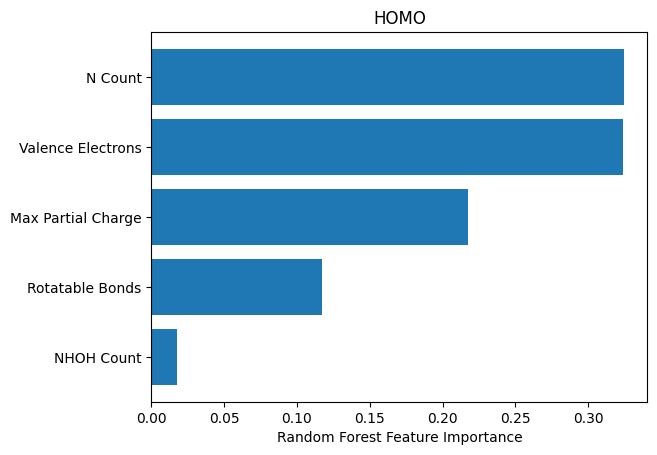

In [37]:
rfr = RandomForestRegressor(random_state=42, max_depth=None, min_samples_leaf=1, min_samples_split=5)
rfr.fit(X_train, y_train)

sorted_idx = rfr.feature_importances_.argsort()
plt.barh(list_numerical[sorted_idx], rfr.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("HOMO")
from sklearn.metrics import mean_squared_error

# Use the forest's predict method on the test data
predictions = rfr.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

prediction = rfr.predict(X_test)
mse = mean_squared_error(y_test, prediction)
#calculate R-squared of regression model
r_squared = rfr.score(X_test, y_test)

#view R-squared value
print("R2: ", r_squared)
rmse = mse**.5
print("MSE: ", mse)
print("RMSE: ", rmse)

In [38]:
y = data['HOMO']
X = data.loc[:, ['Max Absolute Partial Charge', 'Max Partial Charge', 'Min Partial Charge', 'Valence Electrons', 'NHOH Count',
         'Rotatable Bonds', 'Saturated Carbocycles', 'N Count', 'Triple Bonds']]
list_numerical = X.columns


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
regressor_OLS = sm.OLS(endog = y_train, exog = X_train).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   HOMO   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              764.5
Date:                Mon, 03 Jul 2023   Prob (F-statistic):                   4.27e-181
Time:                        12:01:58   Log-Likelihood:                          534.45
No. Observations:                 279   AIC:                                     -1053.
Df Residuals:                     271   BIC:                                     -1024.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Max Absolute Partial Charge    -0.1761      0.186     -0.948      0.344      -0.542       0.190
Max Partial Charge             -0.0927      0.033     -2.789      0.006      -0.158      -0.027
Min Partial Charge              0.0303      0.180      0.169      0.866      -0.323       0.384
Valence Electrons              -0.0005   4.35e-05    -11.397      0.000      -0.001      -0.000
NHOH Count                      0.0315      0.008      4.044      0.000       0.016       0.047
Rotatable Bonds                 0.0083      0.001      7.150      0.000       0.006       0.011
Saturated Carbocycles        2.703e-18   7.17e-18      0.377      0.707   -1.14e-17    1.68e-17
N Count                        -0.0089      0.002     -5.214      0.000      -0.012      -0.006
Triple Bonds                   -0.0021      0.003     -0.750      0.454      -0.008       0.003
==============================================================================
Omnibus:                       25.741   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.706
Skew:                          -0.517   Prob(JB):                     4.37e-11
Kurtosis:                       4.743   Cond. No.                     5.71e+19
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 4.08e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [39]:
y = data['HOMO']
X = data.loc[:, ['Max Absolute Partial Charge',  'Min Partial Charge', 'Valence Electrons', 'NHOH Count',
         'Rotatable Bonds', 'Saturated Carbocycles', 'N Count', 'Triple Bonds']]
list_numerical = X.columns


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
regressor_OLS = sm.OLS(endog = y_train, exog = X_train).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   HOMO   R-squared (uncentered):                   0.956
Model:                            OLS   Adj. R-squared (uncentered):              0.955
Method:                 Least Squares   F-statistic:                              851.4
Date:                Mon, 03 Jul 2023   Prob (F-statistic):                   6.50e-181
Time:                        12:02:19   Log-Likelihood:                          530.50
No. Observations:                 279   AIC:                                     -1047.
Df Residuals:                     272   BIC:                                     -1022.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Max Absolute Partial Charge    -0.3806      0.173     -2.201      0.029      -0.721      -0.040
Min Partial Charge             -0.1372      0.171     -0.800      0.424      -0.475       0.200
Valence Electrons              -0.0005   4.14e-05    -12.966      0.000      -0.001      -0.000
NHOH Count                      0.0197      0.007      2.975      0.003       0.007       0.033
Rotatable Bonds                 0.0090      0.001      7.934      0.000       0.007       0.011
Saturated Carbocycles       -1.116e-19    3.1e-19     -0.359      0.720   -7.23e-19       5e-19
N Count                        -0.0081      0.002     -4.766      0.000      -0.011      -0.005
Triple Bonds                   -0.0029      0.003     -1.032      0.303      -0.008       0.003
==============================================================================
Omnibus:                       18.383   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.985
Skew:                          -0.425   Prob(JB):                     5.08e-07
Kurtosis:                       4.331   Cond. No.                     8.45e+19
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 1.86e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [40]:
y = data['HOMO']
X = data.loc[:, ['Max Absolute Partial Charge',  'Min Partial Charge', 'Valence Electrons', 'NHOH Count',
         'Rotatable Bonds', 'N Count', 'Triple Bonds']]
list_numerical = X.columns


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
regressor_OLS = sm.OLS(endog = y_train, exog = X_train).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   HOMO   R-squared (uncentered):                   0.956
Model:                            OLS   Adj. R-squared (uncentered):              0.955
Method:                 Least Squares   F-statistic:                              851.4
Date:                Mon, 03 Jul 2023   Prob (F-statistic):                   6.50e-181
Time:                        12:02:30   Log-Likelihood:                          530.50
No. Observations:                 279   AIC:                                     -1047.
Df Residuals:                     272   BIC:                                     -1022.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Max Absolute Partial Charge    -0.3806      0.173     -2.201      0.029      -0.721      -0.040
Min Partial Charge             -0.1372      0.171     -0.800      0.424      -0.475       0.200
Valence Electrons              -0.0005   4.14e-05    -12.966      0.000      -0.001      -0.000
NHOH Count                      0.0197      0.007      2.975      0.003       0.007       0.033
Rotatable Bonds                 0.0090      0.001      7.934      0.000       0.007       0.011
N Count                        -0.0081      0.002     -4.766      0.000      -0.011      -0.005
Triple Bonds                   -0.0029      0.003     -1.032      0.303      -0.008       0.003
==============================================================================
Omnibus:                       18.383   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.985
Skew:                          -0.425   Prob(JB):                     5.08e-07
Kurtosis:                       4.331   Cond. No.                     2.42e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
from sklearn.model_selection import GridSearchCV, RepeatedKFold

param_grid = {
    "max_depth": [3,5,10,15,20,None],
    "min_samples_split": [2,5,7,10],
    "min_samples_leaf": [1,2,5]
}

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
rf = RandomForestRegressor(random_state=42)
grid_cv = GridSearchCV(rf, param_grid, scoring=score, n_jobs=-1, cv=cv).fit(X_train, y_train)

print("Param for GS", grid_cv.best_params_)
print("CV score for GS", grid_cv.best_score_)
print("Train AUC ROC Score for GS: ", naive_roc_auc_score(y_train, grid_cv.predict(X_train)))
print("Test AUC ROC Score for GS: ",naive_roc_auc_score(y_test, grid_cv.predict(X_test)))


Param for GS {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5}
CV score for GS 0.7607705324803083
Train AUC ROC Score for GS:  0.9076714462166371
Test AUC ROC Score for GS:  0.7946120689655173


Mean Absolute Error: 0.0 degrees.
R2:  0.6339475212795261
MSE:  3.270454783604949e-05
RMSE:  0.005718789018319306


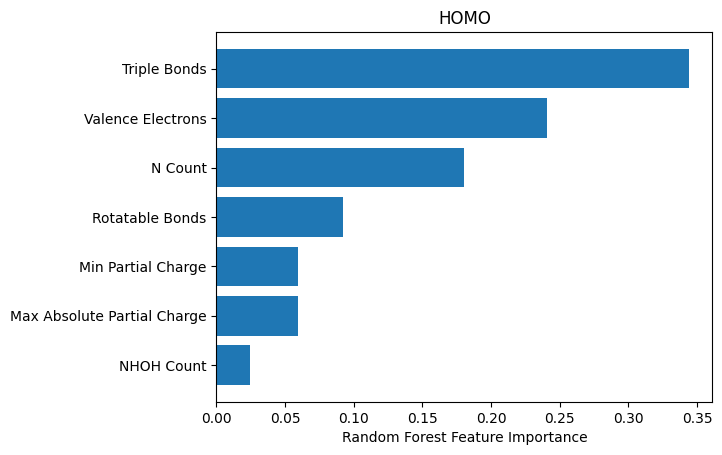

In [42]:
rfr = RandomForestRegressor(random_state=42, max_depth=15, min_samples_leaf=1, min_samples_split=5)
rfr.fit(X_train, y_train)

sorted_idx = rfr.feature_importances_.argsort()
plt.barh(list_numerical[sorted_idx], rfr.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("HOMO")
from sklearn.metrics import mean_squared_error

# Use the forest's predict method on the test data
predictions = rfr.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

prediction = rfr.predict(X_test)
mse = mean_squared_error(y_test, prediction)
#calculate R-squared of regression model
r_squared = rfr.score(X_test, y_test)

#view R-squared value
print("R2: ", r_squared)
rmse = mse**.5
print("MSE: ", mse)
print("RMSE: ", rmse)

LUMO - FORWARD SELECTION

In [118]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [119]:
y = data['LUMO']
X = data.loc[:, ['Molecular Weight', 'Heavy Atom Molecular Weight', 'Max Absolute Partial Charge', 'Max Partial Charge', 
         'Min Abs Partial Charge', 'Min Partial Charge', 'Radical Electrons', 'Valence Electrons', 'NHOH Count', 'NO Count',
         'H Acceptors', 'H Donors', 'Ring Count', 'Aliphatic Rings', 'Aromatic Rings', 'Saturated Rings', 'Aromatic Carbocycles',
         'Aromatic Heterocycles', 'Heteroatoms', 'Rotatable Bonds', 'Saturated Carbocycles', 'Saturated Heterocycles', 'H Count',
         'C Count', 'N Count', 'F Count', 'Halogen Count', 'Double Bonds', 'Triple Bonds']]
list_numerical = X.columns


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)